In [1]:
import sys
import math
import csv

from PIL import Image

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D

In [2]:
src_base_w = 32
src_base_h = 32

In [3]:
tiles_info = []
with open('landh-tiles/landhv3.csv', mode='r') as csv_file:
    csv_reader = csv.DictReader(csv_file)
    line_count = 0
    for row in csv_reader:
        if line_count == 0:
            print(f'Column names are {", ".join(row)}')
            line_count += 1
        tiles_info.append(row)
        line_count += 1
    print(f'Processed {line_count} lines.')
    print(f'Found {len(tiles_info)} tiles.')

Column names are TileName, XCoord, YCoord, SolidFlags, EdgeUp, EdgeDown, EdgeLeft, EdgeRight, Fill, Comment
Processed 105 lines.
Found 104 tiles.


[0, 28, 57, 85, 113, 142, 170, 198, 227, 255]
255


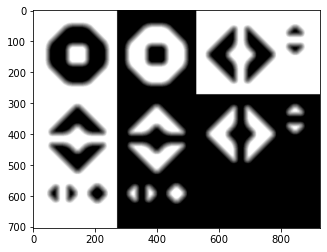

In [4]:
img_filename = 'landh-tiles/landhv3.png'

im_v = Image.open(img_filename)

rgb_im_v = im_v.convert('RGBA')

pixels = rgb_im_v.load()
for sy in range(rgb_im_v.size[1]):
	for sx in range(rgb_im_v.size[0]):
		r, g, b, a = pixels[sx, sy] # Get Pixel Value
		v = max(r, g, b) # Convert to Grey
		if v <= 1:
			v = 0
		pixels[sx, sy] = (v, v, v, 255)

cols_im_v = set()
grey_im_v = set()
for sy in range(rgb_im_v.size[1]):
	for sx in range(rgb_im_v.size[0]):
		c = r, g, b, a = rgb_im_v.getpixel((sx, sy))
		cols_im_v.add(c)
		grey_im_v.add((r + g + b) // 3)

#print(cols_im_v)
print(sorted(grey_im_v))
max_v = max(grey_im_v)
print(max_v)

plt.imshow(rgb_im_v)
plt.show()

del pixels

-3.5999999999999996 5.3999999999999995 -0.6999999999999997


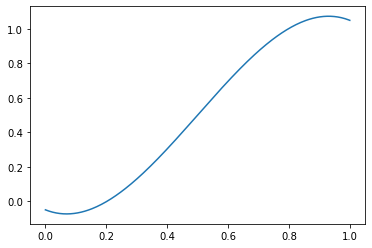

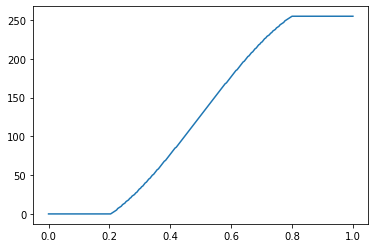

In [5]:

m = 2.
y0 = 0. - 0.05
y1 = 1. + 0.05

#cA = 4*(1. - m)
#cB = -3.*cA/2.
#cC = (cA + 2.)/2

cA = 4. * (y1 - y0 - m)
cB = 6. * (m + y0 - y1)
cC = 3. * (y1 - y0) - 2 * m

print(cA, cB, cC)

X = [x / 255. for x in range(256)]
Y = [(cA * x*x*x + cB * x*x + cC * x + y0) for x in X]

#print(X, Y)

plt.plot(X, Y)
plt.show()

adj_curve = [max(0, min(255, int(255.*y))) for y in Y]

plt.plot(X, adj_curve)
plt.show()

In [6]:
def is_monochromatic_image(img):
    extr = img.getextrema()
    a = 0
    for i in extr:
        if isinstance(i, tuple):
            a += abs(i[0] - i[1])
        else:
            a = abs(extr[0] - extr[1])
            break
    return a == 0

ignoring = set()

for tile_info in tiles_info:
    print(tile_info)
    hpos, vpos = int(tile_info['XCoord']), int(tile_info['YCoord'])

    img = Image.new('L', (src_base_w, src_base_h), 0)
    pixels = img.load()
    
    for voff in range(src_base_h):
        for hoff in range(src_base_w):
            rmap, gmap, bmap, amap = rgb_im_v.getpixel((hpos * src_base_w + hoff, vpos * src_base_h + voff))
            grey = (rmap + gmap + bmap) // 3
            x = grey / 255.
            a = int( 255. * (cA * x*x*x + cB * x*x + cC * x + y0) )
            pixels[hoff, voff] = int(a)

    if is_monochromatic_image(img) and tile_info['TileName'] not in ['A1', 'A2']:
        tile_info['img'] = None
        ignoring.add(tile_info['TileName'])
    else:
        tile_info['img'] = img

print("Ignoring: ", ignoring)
del pixels

{'TileName': 'A1', 'XCoord': '12', 'YCoord': '4', 'SolidFlags': 'BE+BEU+BED+BER+BEL', 'EdgeUp': 'EMPTY', 'EdgeDown': 'EMPTY', 'EdgeLeft': 'EMPTY', 'EdgeRight': 'EMPTY', 'Fill': '0', 'Comment': 'Standard'}
{'TileName': 'A2', 'XCoord': '4', 'YCoord': '4', 'SolidFlags': 'BS+BSU+BSD+BSR+BSL', 'EdgeUp': 'SOLID', 'EdgeDown': 'SOLID', 'EdgeLeft': 'SOLID', 'EdgeRight': 'SOLID', 'Fill': '100', 'Comment': 'Standard'}
{'TileName': 'B1', 'XCoord': '12', 'YCoord': '5', 'SolidFlags': 'BEU+BSD', 'EdgeUp': 'EMPTY', 'EdgeDown': 'SOLID', 'EdgeLeft': 'HALF_DOWN', 'EdgeRight': 'HALF_DOWN', 'Fill': '50', 'Comment': 'Standard'}
{'TileName': 'B2', 'XCoord': '11', 'YCoord': '4', 'SolidFlags': 'BER+BSL', 'EdgeUp': 'HALF_LEFT', 'EdgeDown': 'HALF_LEFT', 'EdgeLeft': 'SOLID', 'EdgeRight': 'EMPTY', 'Fill': '50', 'Comment': 'Standard'}
{'TileName': 'B3', 'XCoord': '12', 'YCoord': '3', 'SolidFlags': 'BED+BSU', 'EdgeUp': 'SOLID', 'EdgeDown': 'EMPTY', 'EdgeLeft': 'HALF_UP', 'EdgeRight': 'HALF_UP', 'Fill': '50', 'Commen

{'TileName': 'G25', 'XCoord': '21', 'YCoord': '7', 'SolidFlags': 'BSD+BSL+BSR', 'EdgeUp': 'OCOR_RIGHTN', 'EdgeDown': 'SOLID', 'EdgeLeft': 'SOLID', 'EdgeRight': 'SCOR_UPN', 'Fill': '85', 'Comment': 'Close Corners'}
{'TileName': 'G26', 'XCoord': '20', 'YCoord': '7', 'SolidFlags': 'BSD+BSL+BSR', 'EdgeUp': 'OCOR_LEFTN', 'EdgeDown': 'SOLID', 'EdgeLeft': 'SCOR_UPN', 'EdgeRight': 'SOLID', 'Fill': '85', 'Comment': 'Close Corners'}
{'TileName': 'G27', 'XCoord': '1', 'YCoord': '13', 'SolidFlags': 'BSL+BSU+BSD', 'EdgeUp': 'SOLID', 'EdgeDown': 'SCOR_RIGHTN', 'EdgeLeft': 'SOLID', 'EdgeRight': 'OCOR_DOWNN', 'Fill': '85', 'Comment': 'Close Corners'}
{'TileName': 'G28', 'XCoord': '1', 'YCoord': '12', 'SolidFlags': 'BSL+BSU+BSD', 'EdgeUp': 'SCOR_RIGHTN', 'EdgeDown': 'SOLID', 'EdgeLeft': 'SOLID', 'EdgeRight': 'OCOR_UPN', 'Fill': '85', 'Comment': 'Close Corners'}
{'TileName': 'H11', 'XCoord': '20', 'YCoord': '10', 'SolidFlags': 'BER', 'EdgeUp': 'HCOR_LEFTT', 'EdgeDown': 'HALF_LEFT', 'EdgeLeft': 'SCOR_UPT

{'TileName': 'A1', 'XCoord': '12', 'YCoord': '4', 'SolidFlags': 'BE+BEU+BED+BER+BEL', 'EdgeUp': 'EMPTY', 'EdgeDown': 'EMPTY', 'EdgeLeft': 'EMPTY', 'EdgeRight': 'EMPTY', 'Fill': '0', 'Comment': 'Standard', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F15B56A0>}


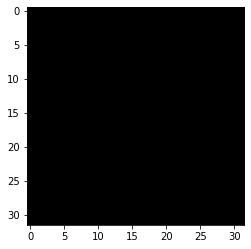

{'TileName': 'A2', 'XCoord': '4', 'YCoord': '4', 'SolidFlags': 'BS+BSU+BSD+BSR+BSL', 'EdgeUp': 'SOLID', 'EdgeDown': 'SOLID', 'EdgeLeft': 'SOLID', 'EdgeRight': 'SOLID', 'Fill': '100', 'Comment': 'Standard', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F15B57F0>}


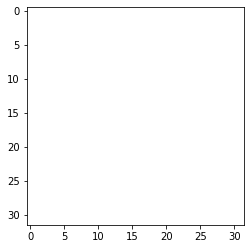

{'TileName': 'B1', 'XCoord': '12', 'YCoord': '5', 'SolidFlags': 'BEU+BSD', 'EdgeUp': 'EMPTY', 'EdgeDown': 'SOLID', 'EdgeLeft': 'HALF_DOWN', 'EdgeRight': 'HALF_DOWN', 'Fill': '50', 'Comment': 'Standard', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F15B5850>}


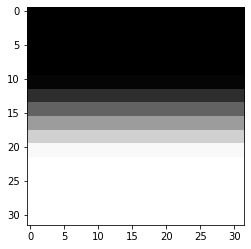

{'TileName': 'B2', 'XCoord': '11', 'YCoord': '4', 'SolidFlags': 'BER+BSL', 'EdgeUp': 'HALF_LEFT', 'EdgeDown': 'HALF_LEFT', 'EdgeLeft': 'SOLID', 'EdgeRight': 'EMPTY', 'Fill': '50', 'Comment': 'Standard', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F15B5D90>}


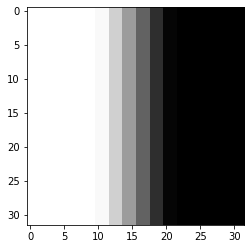

{'TileName': 'B3', 'XCoord': '12', 'YCoord': '3', 'SolidFlags': 'BED+BSU', 'EdgeUp': 'SOLID', 'EdgeDown': 'EMPTY', 'EdgeLeft': 'HALF_UP', 'EdgeRight': 'HALF_UP', 'Fill': '50', 'Comment': 'Standard', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F15B5CA0>}


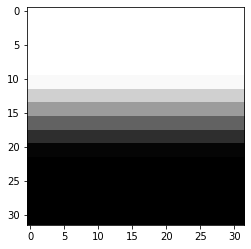

{'TileName': 'B4', 'XCoord': '13', 'YCoord': '4', 'SolidFlags': 'BEL+BSR', 'EdgeUp': 'HALF_RIGHT', 'EdgeDown': 'HALF_RIGHT', 'EdgeLeft': 'EMPTY', 'EdgeRight': 'SOLID', 'Fill': '50', 'Comment': 'Standard', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F15A2E20>}


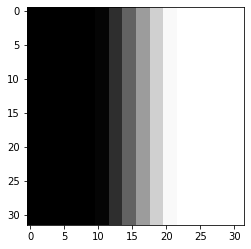

{'TileName': 'C11', 'XCoord': '3', 'YCoord': '3', 'SolidFlags': 'BEU+BEL', 'EdgeUp': 'EMPTY', 'EdgeDown': 'HALF_RIGHT', 'EdgeLeft': 'EMPTY', 'EdgeRight': 'HALF_DOWN', 'Fill': '25', 'Comment': 'Standard', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F15A26A0>}


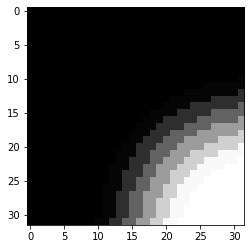

{'TileName': 'C12', 'XCoord': '5', 'YCoord': '3', 'SolidFlags': 'BEU+BER', 'EdgeUp': 'EMPTY', 'EdgeDown': 'HALF_LEFT', 'EdgeLeft': 'HALF_DOWN', 'EdgeRight': 'EMPTY', 'Fill': '25', 'Comment': 'Standard', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F15A26D0>}


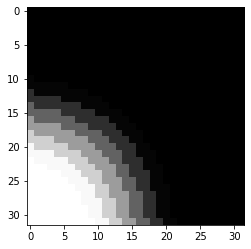

{'TileName': 'C13', 'XCoord': '5', 'YCoord': '5', 'SolidFlags': 'BED+BER', 'EdgeUp': 'HALF_LEFT', 'EdgeDown': 'EMPTY', 'EdgeLeft': 'HALF_UP', 'EdgeRight': 'EMPTY', 'Fill': '25', 'Comment': 'Standard', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F15A2E80>}


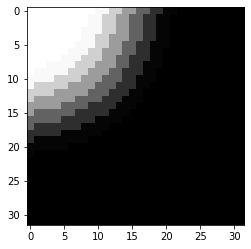

{'TileName': 'C14', 'XCoord': '3', 'YCoord': '5', 'SolidFlags': 'BED+BEL', 'EdgeUp': 'HALF_RIGHT', 'EdgeDown': 'EMPTY', 'EdgeLeft': 'EMPTY', 'EdgeRight': 'HALF_UP', 'Fill': '25', 'Comment': 'Standard', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F15A2B20>}


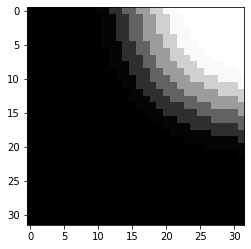

{'TileName': 'C21', 'XCoord': '11', 'YCoord': '3', 'SolidFlags': 'BSU+BSL', 'EdgeUp': 'SOLID', 'EdgeDown': 'HALF_LEFT', 'EdgeLeft': 'SOLID', 'EdgeRight': 'HALF_UP', 'Fill': '75', 'Comment': 'Standard', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F15A2CD0>}


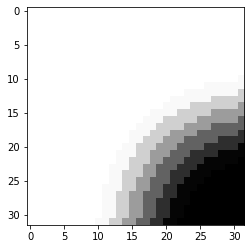

{'TileName': 'C22', 'XCoord': '13', 'YCoord': '3', 'SolidFlags': 'BSU+BSR', 'EdgeUp': 'SOLID', 'EdgeDown': 'HALF_RIGHT', 'EdgeLeft': 'HALF_UP', 'EdgeRight': 'SOLID', 'Fill': '75', 'Comment': 'Standard', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F15A2AF0>}


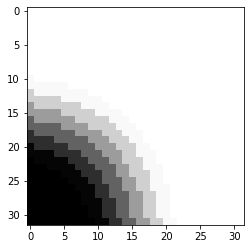

{'TileName': 'C23', 'XCoord': '13', 'YCoord': '5', 'SolidFlags': 'BSD+BSR', 'EdgeUp': 'HALF_RIGHT', 'EdgeDown': 'SOLID', 'EdgeLeft': 'HALF_DOWN', 'EdgeRight': 'SOLID', 'Fill': '75', 'Comment': 'Standard', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F15A2610>}


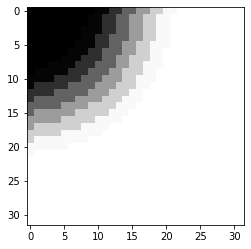

{'TileName': 'C24', 'XCoord': '11', 'YCoord': '5', 'SolidFlags': 'BSD+BSL', 'EdgeUp': 'HALF_LEFT', 'EdgeDown': 'SOLID', 'EdgeLeft': 'SOLID', 'EdgeRight': 'HALF_DOWN', 'Fill': '75', 'Comment': 'Standard', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F15A2310>}


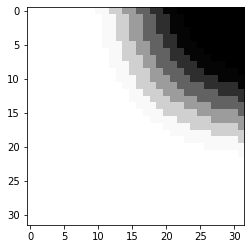

{'TileName': 'D11', 'XCoord': '11', 'YCoord': '1', 'SolidFlags': 'BSD+BEU', 'EdgeUp': 'EMPTY', 'EdgeDown': 'SCOR_LEFTN', 'EdgeLeft': 'ECOR_DOWNN', 'EdgeRight': 'HALF_DOWN', 'Fill': '35', 'Comment': 'Open Corners', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F15A22E0>}


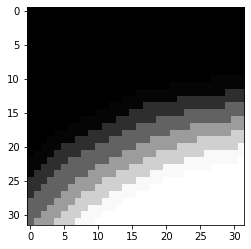

{'TileName': 'D12', 'XCoord': '13', 'YCoord': '1', 'SolidFlags': 'BSD+BEU', 'EdgeUp': 'EMPTY', 'EdgeDown': 'SCOR_RIGHTN', 'EdgeLeft': 'HALF_DOWN', 'EdgeRight': 'ECOR_DOWNN', 'Fill': '35', 'Comment': 'Open Corners', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F15A2D30>}


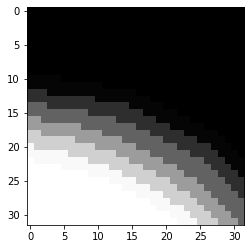

{'TileName': 'D13', 'XCoord': '15', 'YCoord': '3', 'SolidFlags': 'BSL+BER', 'EdgeUp': 'ECOR_LEFTN', 'EdgeDown': 'HALF_LEFT', 'EdgeLeft': 'SCOR_UPN', 'EdgeRight': 'EMPTY', 'Fill': '35', 'Comment': 'Open Corners', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F15A28B0>}


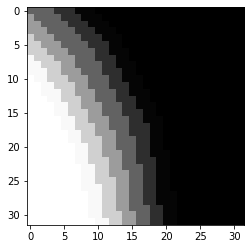

{'TileName': 'D14', 'XCoord': '15', 'YCoord': '5', 'SolidFlags': 'BSL+BER', 'EdgeUp': 'HALF_LEFT', 'EdgeDown': 'ECOR_LEFTN', 'EdgeLeft': 'SCOR_DOWNN', 'EdgeRight': 'EMPTY', 'Fill': '35', 'Comment': 'Open Corners', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F15A2880>}


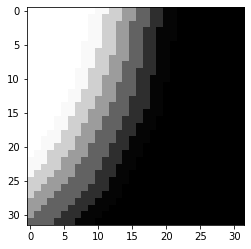

{'TileName': 'D15', 'XCoord': '13', 'YCoord': '7', 'SolidFlags': 'BSU+BED', 'EdgeUp': 'SCOR_RIGHTN', 'EdgeDown': 'EMPTY', 'EdgeLeft': 'HALF_UP', 'EdgeRight': 'ECOR_UPN', 'Fill': '35', 'Comment': 'Open Corners', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F15A2190>}


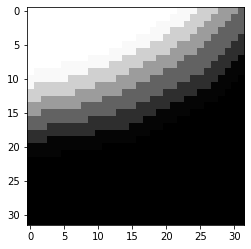

{'TileName': 'D16', 'XCoord': '11', 'YCoord': '7', 'SolidFlags': 'BSU+BED', 'EdgeUp': 'SCOR_LEFTN', 'EdgeDown': 'EMPTY', 'EdgeLeft': 'ECOR_UPN', 'EdgeRight': 'HALF_UP', 'Fill': '35', 'Comment': 'Open Corners', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F15A2790>}


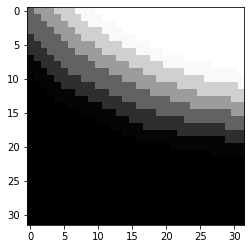

{'TileName': 'D17', 'XCoord': '9', 'YCoord': '5', 'SolidFlags': 'BSR+BEL', 'EdgeUp': 'HALF_RIGHT', 'EdgeDown': 'ECOR_RIGHTN', 'EdgeLeft': 'EMPTY', 'EdgeRight': 'SCOR_DOWNN', 'Fill': '35', 'Comment': 'Open Corners', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F15A23A0>}


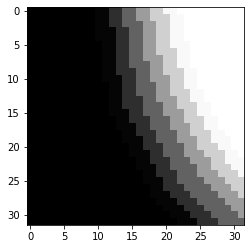

{'TileName': 'D18', 'XCoord': '9', 'YCoord': '3', 'SolidFlags': 'BSR+BEL', 'EdgeUp': 'ECOR_RIGHTN', 'EdgeDown': 'HALF_RIGHT', 'EdgeLeft': 'EMPTY', 'EdgeRight': 'SCOR_UPN', 'Fill': '35', 'Comment': 'Open Corners', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F15808B0>}


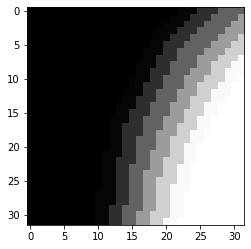

{'TileName': 'D21', 'XCoord': '3', 'YCoord': '1', 'SolidFlags': 'BED+BSU', 'EdgeUp': 'SOLID', 'EdgeDown': 'ECOR_LEFTN', 'EdgeLeft': 'SCOR_DOWNN', 'EdgeRight': 'HALF_UP', 'Fill': '65', 'Comment': 'Open Corners', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F1580940>}


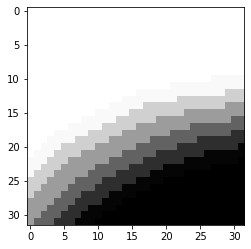

{'TileName': 'D22', 'XCoord': '5', 'YCoord': '1', 'SolidFlags': 'BED+BSU', 'EdgeUp': 'SOLID', 'EdgeDown': 'ECOR_RIGHTN', 'EdgeLeft': 'HALF_UP', 'EdgeRight': 'SCOR_UPN', 'Fill': '65', 'Comment': 'Open Corners', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F1580430>}


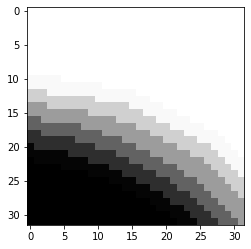

{'TileName': 'D23', 'XCoord': '7', 'YCoord': '3', 'SolidFlags': 'BEL+BSR', 'EdgeUp': 'SCOR_LEFTN', 'EdgeDown': 'HALF_RIGHT', 'EdgeLeft': 'ECOR_UPN', 'EdgeRight': 'SOLID', 'Fill': '65', 'Comment': 'Open Corners', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F1580040>}


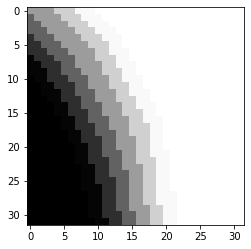

{'TileName': 'D24', 'XCoord': '7', 'YCoord': '5', 'SolidFlags': 'BEL+BSR', 'EdgeUp': 'HALF_RIGHT', 'EdgeDown': 'SCOR_LEFTN', 'EdgeLeft': 'ECOR_DOWNN', 'EdgeRight': 'SOLID', 'Fill': '65', 'Comment': 'Open Corners', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F1580100>}


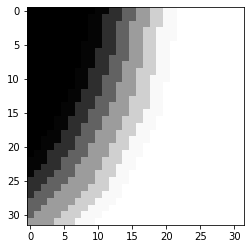

{'TileName': 'D25', 'XCoord': '5', 'YCoord': '7', 'SolidFlags': 'BEU+BSD', 'EdgeUp': 'ECOR_RIGHTN', 'EdgeDown': 'SOLID', 'EdgeLeft': 'HALF_DOWN', 'EdgeRight': 'SCOR_UPN', 'Fill': '65', 'Comment': 'Open Corners', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F1580220>}


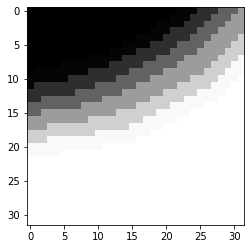

{'TileName': 'D26', 'XCoord': '3', 'YCoord': '7', 'SolidFlags': 'BEU+BSD', 'EdgeUp': 'ECOR_LEFTN', 'EdgeDown': 'SOLID', 'EdgeLeft': 'SCOR_UPN', 'EdgeRight': 'HALF_DOWN', 'Fill': '65', 'Comment': 'Open Corners', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F1580340>}


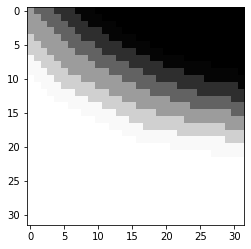

{'TileName': 'D27', 'XCoord': '1', 'YCoord': '5', 'SolidFlags': 'BER+BSL', 'EdgeUp': 'HALF_LEFT', 'EdgeDown': 'SCOR_RIGHTN', 'EdgeLeft': 'SOLID', 'EdgeRight': 'ECOR_DOWNN', 'Fill': '65', 'Comment': 'Open Corners', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F1580DF0>}


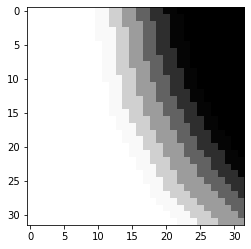

{'TileName': 'D28', 'XCoord': '1', 'YCoord': '3', 'SolidFlags': 'BER+BSL', 'EdgeUp': 'SCOR_RIGHTN', 'EdgeDown': 'HALF_LEFT', 'EdgeLeft': 'SOLID', 'EdgeRight': 'ECOR_UPN', 'Fill': '65', 'Comment': 'Open Corners', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F1580EB0>}


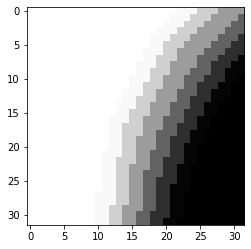

{'TileName': 'E1', 'XCoord': '10', 'YCoord': '2', 'SolidFlags': 'BEU+BSR+BSD+BEL', 'EdgeUp': 'ECOR_RIGHTN', 'EdgeDown': 'SCOR_LEFTN', 'EdgeLeft': 'ECOR_DOWNN', 'EdgeRight': 'SCOR_UPN', 'Fill': '50', 'Comment': 'Oblique Tiles', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F1580FA0>}


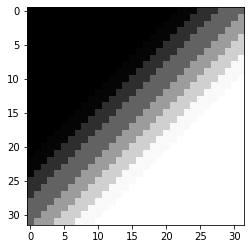

{'TileName': 'E2', 'XCoord': '14', 'YCoord': '2', 'SolidFlags': 'BEU+BER+BSD+BSL', 'EdgeUp': 'ECOR_LEFTN', 'EdgeDown': 'SCOR_RIGHTN', 'EdgeLeft': 'SCOR_UPN', 'EdgeRight': 'ECOR_DOWNN', 'Fill': '50', 'Comment': 'Oblique Tiles', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F1580AF0>}


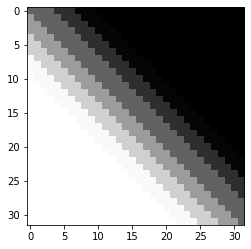

{'TileName': 'E3', 'XCoord': '14', 'YCoord': '6', 'SolidFlags': 'BSU+BER+BED+BSL', 'EdgeUp': 'SCOR_RIGHTN', 'EdgeDown': 'ECOR_LEFTN', 'EdgeLeft': 'SCOR_DOWNN', 'EdgeRight': 'ECOR_UPN', 'Fill': '50', 'Comment': 'Oblique Tiles', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F1580BB0>}


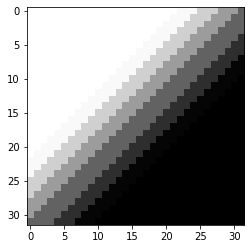

{'TileName': 'E4', 'XCoord': '10', 'YCoord': '6', 'SolidFlags': 'BSU+BSR+BED+BEL', 'EdgeUp': 'SCOR_LEFTN', 'EdgeDown': 'ECOR_RIGHTN', 'EdgeLeft': 'ECOR_UPN', 'EdgeRight': 'SCOR_DOWNN', 'Fill': '50', 'Comment': 'Oblique Tiles', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F1580CA0>}


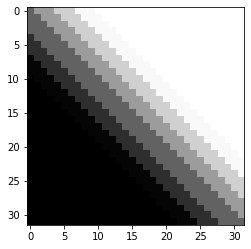

{'TileName': 'F11', 'XCoord': '14', 'YCoord': '7', 'SolidFlags': 'BE+BEU+BED+BER+BEL', 'EdgeUp': 'ECOR_LEFTT', 'EdgeDown': 'EMPTY', 'EdgeLeft': 'ECOR_UPT', 'EdgeRight': 'EMPTY', 'Fill': '5', 'Comment': 'Oblique Tiles', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F15804F0>}


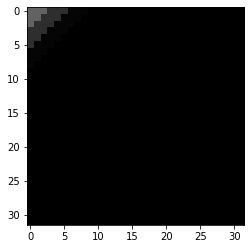

{'TileName': 'F12', 'XCoord': '10', 'YCoord': '7', 'SolidFlags': 'BE+BEU+BED+BER+BEL', 'EdgeUp': 'ECOR_RIGHTT', 'EdgeDown': 'EMPTY', 'EdgeLeft': 'EMPTY', 'EdgeRight': 'ECOR_UPT', 'Fill': '5', 'Comment': 'Oblique Tiles', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F1580700>}


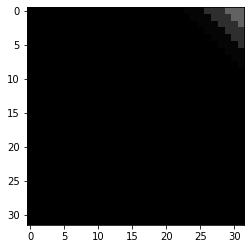

{'TileName': 'F13', 'XCoord': '10', 'YCoord': '1', 'SolidFlags': 'BE+BEU+BED+BER+BEL', 'EdgeUp': 'EMPTY', 'EdgeDown': 'ECOR_RIGHTT', 'EdgeLeft': 'EMPTY', 'EdgeRight': 'ECOR_DOWNT', 'Fill': '5', 'Comment': 'Oblique Tiles', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F15807C0>}


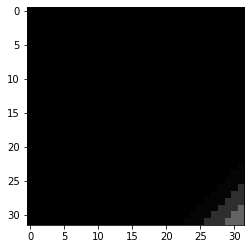

{'TileName': 'F14', 'XCoord': '14', 'YCoord': '1', 'SolidFlags': 'BE+BEU+BED+BER+BEL', 'EdgeUp': 'EMPTY', 'EdgeDown': 'ECOR_LEFTT', 'EdgeLeft': 'ECOR_DOWNT', 'EdgeRight': 'EMPTY', 'Fill': '5', 'Comment': 'Oblique Tiles', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F15620A0>}


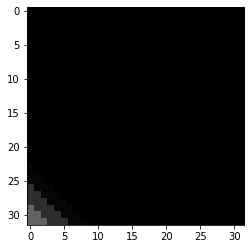

{'TileName': 'F15', 'XCoord': '3', 'YCoord': '11', 'SolidFlags': 'BE+BEU+BED+BER+BEL', 'EdgeUp': 'ECOR_LEFTT', 'EdgeDown': 'ECOR_RIGHTT', 'EdgeLeft': 'ECOR_UPT', 'EdgeRight': 'ECOR_DOWNT', 'Fill': '10', 'Comment': 'Oblique Tiles', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F1562AC0>}


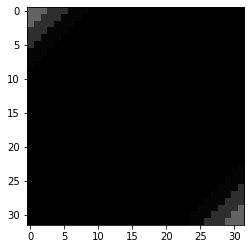

{'TileName': 'F16', 'XCoord': '5', 'YCoord': '11', 'SolidFlags': 'BE+BEU+BED+BER+BEL', 'EdgeUp': 'ECOR_RIGHTT', 'EdgeDown': 'ECOR_LEFTT', 'EdgeLeft': 'ECOR_DOWNT', 'EdgeRight': 'ECOR_UPT', 'Fill': '10', 'Comment': 'Oblique Tiles', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F15628E0>}


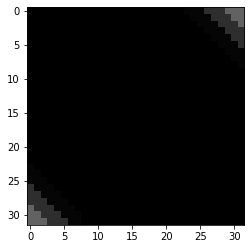

{'TileName': 'F21', 'XCoord': '10', 'YCoord': '3', 'SolidFlags': 'BS+BSU+BSD+BSR+BSL', 'EdgeUp': 'SCOR_LEFTT', 'EdgeDown': 'SOLID', 'EdgeLeft': 'SCOR_UPT', 'EdgeRight': 'SOLID', 'Fill': '95', 'Comment': 'Oblique Tiles', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F1562C10>}


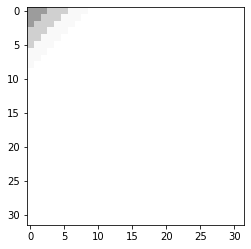

{'TileName': 'F22', 'XCoord': '14', 'YCoord': '3', 'SolidFlags': 'BS+BSU+BSD+BSR+BSL', 'EdgeUp': 'SCOR_RIGHTT', 'EdgeDown': 'SOLID', 'EdgeLeft': 'SOLID', 'EdgeRight': 'SCOR_UPT', 'Fill': '95', 'Comment': 'Oblique Tiles', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F1562BE0>}


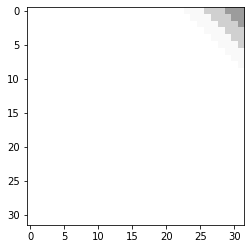

{'TileName': 'F23', 'XCoord': '14', 'YCoord': '5', 'SolidFlags': 'BS+BSU+BSD+BSR+BSL', 'EdgeUp': 'SOLID', 'EdgeDown': 'SCOR_RIGHTT', 'EdgeLeft': 'SOLID', 'EdgeRight': 'SCOR_DOWNT', 'Fill': '95', 'Comment': 'Oblique Tiles', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F1562AF0>}


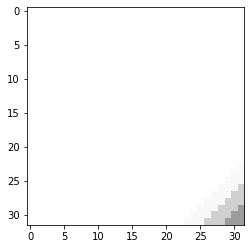

{'TileName': 'F24', 'XCoord': '10', 'YCoord': '5', 'SolidFlags': 'BS+BSU+BSD+BSR+BSL', 'EdgeUp': 'SOLID', 'EdgeDown': 'SCOR_LEFTT', 'EdgeLeft': 'SCOR_DOWNT', 'EdgeRight': 'SOLID', 'Fill': '95', 'Comment': 'Oblique Tiles', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F15621C0>}


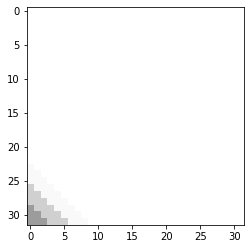

{'TileName': 'F25', 'XCoord': '11', 'YCoord': '11', 'SolidFlags': 'BS+BSU+BSD+BSR+BSL', 'EdgeUp': 'SCOR_LEFTT', 'EdgeDown': 'SCOR_RIGHTT', 'EdgeLeft': 'SCOR_UPT', 'EdgeRight': 'SCOR_DOWNT', 'Fill': '90', 'Comment': 'Oblique Tiles', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F1562D60>}


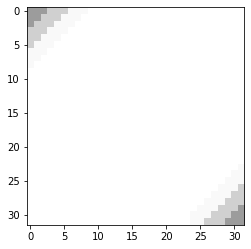

{'TileName': 'F26', 'XCoord': '13', 'YCoord': '11', 'SolidFlags': 'BS+BSU+BSD+BSR+BSL', 'EdgeUp': 'SCOR_RIGHTT', 'EdgeDown': 'SCOR_LEFTT', 'EdgeLeft': 'SCOR_DOWNT', 'EdgeRight': 'SCOR_UPT', 'Fill': '90', 'Comment': 'Oblique Tiles', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F1562FD0>}


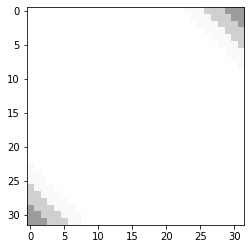

{'TileName': 'G11', 'XCoord': '20', 'YCoord': '9', 'SolidFlags': 'BEU+BER+BEL', 'EdgeUp': 'EMPTY', 'EdgeDown': 'HCOR_LEFTN', 'EdgeLeft': 'ECOR_DOWNN', 'EdgeRight': 'EMPTY', 'Fill': '15', 'Comment': 'Close Corners', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F1562F10>}


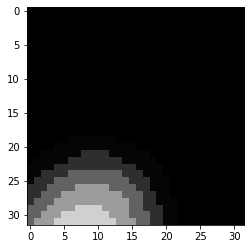

{'TileName': 'G12', 'XCoord': '21', 'YCoord': '9', 'SolidFlags': 'BEU+BER+BEL', 'EdgeUp': 'EMPTY', 'EdgeDown': 'HCOR_RIGHTN', 'EdgeLeft': 'EMPTY', 'EdgeRight': 'ECOR_DOWNN', 'Fill': '15', 'Comment': 'Close Corners', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F1562EB0>}


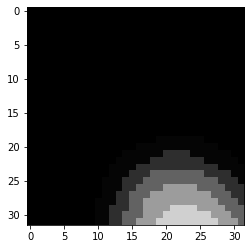

{'TileName': 'G13', 'XCoord': '15', 'YCoord': '12', 'SolidFlags': 'BER+BED+BEU', 'EdgeUp': 'ECOR_LEFTN', 'EdgeDown': 'EMPTY', 'EdgeLeft': 'HCOR_UPN', 'EdgeRight': 'EMPTY', 'Fill': '15', 'Comment': 'Close Corners', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F1562190>}


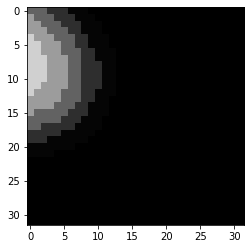

{'TileName': 'G14', 'XCoord': '15', 'YCoord': '13', 'SolidFlags': 'BER+BED+BEU', 'EdgeUp': 'EMPTY', 'EdgeDown': 'ECOR_LEFTN', 'EdgeLeft': 'HCOR_DOWNN', 'EdgeRight': 'EMPTY', 'Fill': '15', 'Comment': 'Close Corners', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F1562280>}


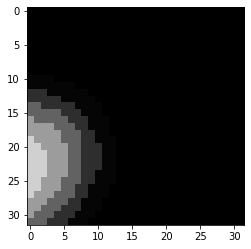

{'TileName': 'G15', 'XCoord': '21', 'YCoord': '15', 'SolidFlags': 'BED+BEL+BER', 'EdgeUp': 'HCOR_RIGHTN', 'EdgeDown': 'EMPTY', 'EdgeLeft': 'EMPTY', 'EdgeRight': 'ECOR_UPN', 'Fill': '15', 'Comment': 'Close Corners', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F15624F0>}


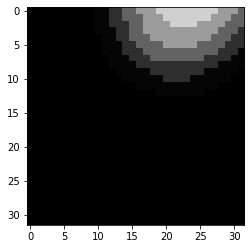

{'TileName': 'G16', 'XCoord': '20', 'YCoord': '15', 'SolidFlags': 'BED+BEL+BER', 'EdgeUp': 'HCOR_LEFTN', 'EdgeDown': 'EMPTY', 'EdgeLeft': 'ECOR_UPN', 'EdgeRight': 'EMPTY', 'Fill': '15', 'Comment': 'Close Corners', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F1562640>}


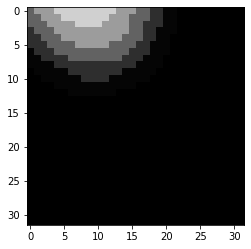

{'TileName': 'G17', 'XCoord': '9', 'YCoord': '13', 'SolidFlags': 'BEL+BEU+BED', 'EdgeUp': 'EMPTY', 'EdgeDown': 'HCOR_RIGHTN', 'EdgeLeft': 'EMPTY', 'EdgeRight': 'SCOR_DOWNN', 'Fill': '15', 'Comment': 'Close Corners', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F1562910>}


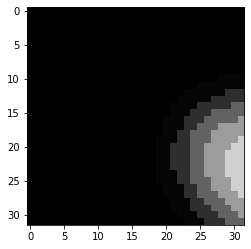

{'TileName': 'G18', 'XCoord': '9', 'YCoord': '12', 'SolidFlags': 'BEL+BEU+BED', 'EdgeUp': 'HCOR_RIGHTN', 'EdgeDown': 'EMPTY', 'EdgeLeft': 'EMPTY', 'EdgeRight': 'SCOR_UPN', 'Fill': '15', 'Comment': 'Close Corners', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F1562580>}


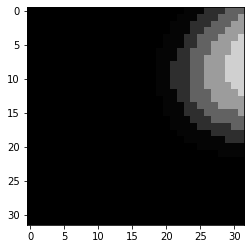

{'TileName': 'G21', 'XCoord': '20', 'YCoord': '1', 'SolidFlags': 'BSU+BSR+BSL', 'EdgeUp': 'SOLID', 'EdgeDown': 'OCOR_LEFTN', 'EdgeLeft': 'SCOR_DOWNN', 'EdgeRight': 'SOLID', 'Fill': '85', 'Comment': 'Close Corners', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F150AFD0>}


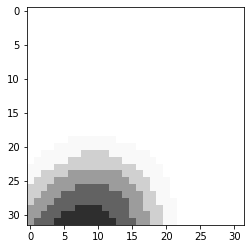

{'TileName': 'G22', 'XCoord': '21', 'YCoord': '1', 'SolidFlags': 'BSU+BSR+BSL', 'EdgeUp': 'SOLID', 'EdgeDown': 'OCOR_RIGHTN', 'EdgeLeft': 'SOLID', 'EdgeRight': 'SCOR_DOWNN', 'Fill': '85', 'Comment': 'Close Corners', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F150AA30>}


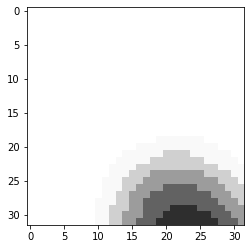

{'TileName': 'G23', 'XCoord': '7', 'YCoord': '12', 'SolidFlags': 'BSR+BSD+BSU', 'EdgeUp': 'SCOR_LEFTN', 'EdgeDown': 'SOLID', 'EdgeLeft': 'OCOR_UPN', 'EdgeRight': 'SOLID', 'Fill': '85', 'Comment': 'Close Corners', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F150A2B0>}


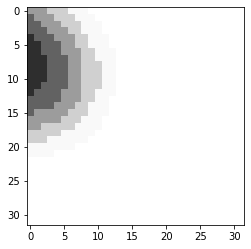

{'TileName': 'G24', 'XCoord': '7', 'YCoord': '13', 'SolidFlags': 'BSR+BSD+BSU', 'EdgeUp': 'SOLID', 'EdgeDown': 'SCOR_LEFTN', 'EdgeLeft': 'OCOR_DOWNN', 'EdgeRight': 'SOLID', 'Fill': '85', 'Comment': 'Close Corners', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F1562880>}


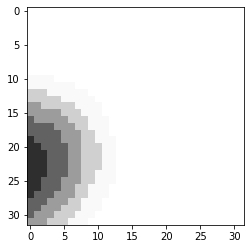

{'TileName': 'G25', 'XCoord': '21', 'YCoord': '7', 'SolidFlags': 'BSD+BSL+BSR', 'EdgeUp': 'OCOR_RIGHTN', 'EdgeDown': 'SOLID', 'EdgeLeft': 'SOLID', 'EdgeRight': 'SCOR_UPN', 'Fill': '85', 'Comment': 'Close Corners', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F1562610>}


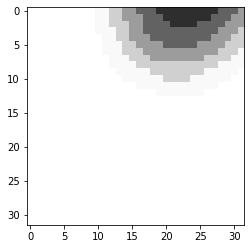

{'TileName': 'G26', 'XCoord': '20', 'YCoord': '7', 'SolidFlags': 'BSD+BSL+BSR', 'EdgeUp': 'OCOR_LEFTN', 'EdgeDown': 'SOLID', 'EdgeLeft': 'SCOR_UPN', 'EdgeRight': 'SOLID', 'Fill': '85', 'Comment': 'Close Corners', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F15622B0>}


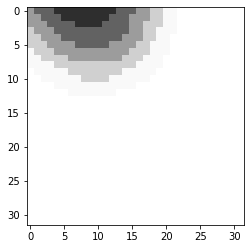

{'TileName': 'G27', 'XCoord': '1', 'YCoord': '13', 'SolidFlags': 'BSL+BSU+BSD', 'EdgeUp': 'SOLID', 'EdgeDown': 'SCOR_RIGHTN', 'EdgeLeft': 'SOLID', 'EdgeRight': 'OCOR_DOWNN', 'Fill': '85', 'Comment': 'Close Corners', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F1562E80>}


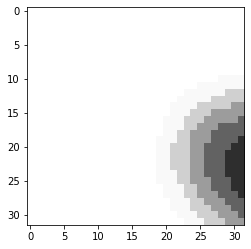

{'TileName': 'G28', 'XCoord': '1', 'YCoord': '12', 'SolidFlags': 'BSL+BSU+BSD', 'EdgeUp': 'SCOR_RIGHTN', 'EdgeDown': 'SOLID', 'EdgeLeft': 'SOLID', 'EdgeRight': 'OCOR_UPN', 'Fill': '85', 'Comment': 'Close Corners', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F1562F70>}


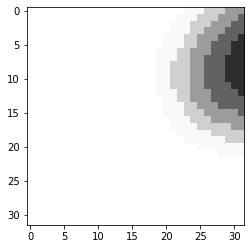

{'TileName': 'H11', 'XCoord': '20', 'YCoord': '10', 'SolidFlags': 'BER', 'EdgeUp': 'HCOR_LEFTT', 'EdgeDown': 'HALF_LEFT', 'EdgeLeft': 'SCOR_UPT', 'EdgeRight': 'EMPTY', 'Fill': '45', 'Comment': 'Close Corners', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F1562490>}


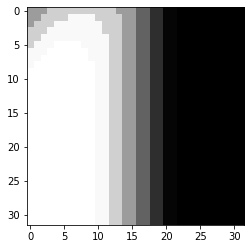

{'TileName': 'H12', 'XCoord': '21', 'YCoord': '10', 'SolidFlags': 'BEL', 'EdgeUp': 'HCOR_RIGHTT', 'EdgeDown': 'HALF_RIGHT', 'EdgeLeft': 'EMPTY', 'EdgeRight': 'SCOR_UPT', 'Fill': '45', 'Comment': 'Close Corners', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F1562D90>}


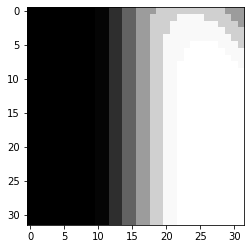

{'TileName': 'H13', 'XCoord': '14', 'YCoord': '12', 'SolidFlags': 'BED', 'EdgeUp': 'SCOR_RIGHTT', 'EdgeDown': 'EMPTY', 'EdgeLeft': 'HALF_UP', 'EdgeRight': 'HCOR_UPT', 'Fill': '45', 'Comment': 'Close Corners', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F1562CA0>}


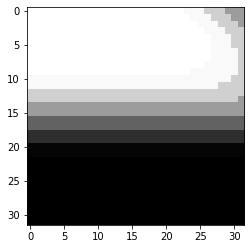

{'TileName': 'H14', 'XCoord': '14', 'YCoord': '13', 'SolidFlags': 'BEU', 'EdgeUp': 'EMPTY', 'EdgeDown': 'SCOR_RIGHTT', 'EdgeLeft': 'HALF_DOWN', 'EdgeRight': 'HCOR_DOWNT', 'Fill': '45', 'Comment': 'Close Corners', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F15E6100>}


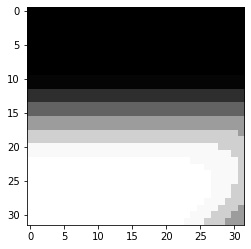

{'TileName': 'H15', 'XCoord': '21', 'YCoord': '14', 'SolidFlags': 'BEL', 'EdgeUp': 'HALF_RIGHT', 'EdgeDown': 'HCOR_RIGHTT', 'EdgeLeft': 'EMPTY', 'EdgeRight': 'SCOR_DOWNT', 'Fill': '45', 'Comment': 'Close Corners', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F1562970>}


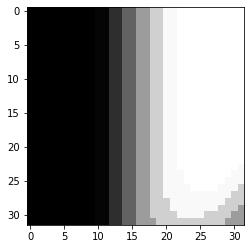

{'TileName': 'H16', 'XCoord': '20', 'YCoord': '14', 'SolidFlags': 'BER', 'EdgeUp': 'HALF_LEFT', 'EdgeDown': 'HCOR_LEFTT', 'EdgeLeft': 'SCOR_DOWNT', 'EdgeRight': 'EMPTY', 'Fill': '45', 'Comment': 'Close Corners', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F15628B0>}


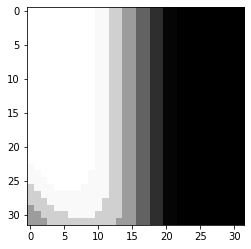

{'TileName': 'H17', 'XCoord': '10', 'YCoord': '13', 'SolidFlags': 'BEU', 'EdgeUp': 'EMPTY', 'EdgeDown': 'SCOR_LEFTT', 'EdgeLeft': 'HCOR_DOWNT', 'EdgeRight': 'HALF_DOWN', 'Fill': '45', 'Comment': 'Close Corners', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F1562700>}


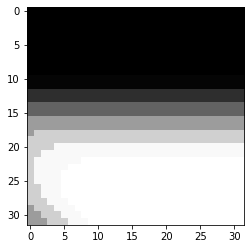

{'TileName': 'H18', 'XCoord': '10', 'YCoord': '12', 'SolidFlags': 'BED', 'EdgeUp': 'SCOR_LEFTT', 'EdgeDown': 'EMPTY', 'EdgeLeft': 'HCOR_UPT', 'EdgeRight': 'HALF_UP', 'Fill': '45', 'Comment': 'Close Corners', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F1580970>}


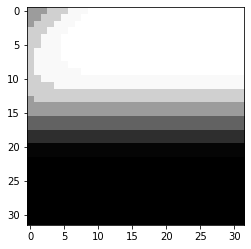

{'TileName': 'H21', 'XCoord': '20', 'YCoord': '2', 'SolidFlags': 'BSR', 'EdgeUp': 'OCOR_LEFTT', 'EdgeDown': 'HALF_RIGHT', 'EdgeLeft': 'ECOR_UPT', 'EdgeRight': 'SOLID', 'Fill': '55', 'Comment': 'Close Corners', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F1580730>}


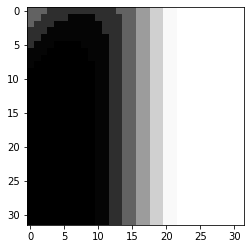

{'TileName': 'H22', 'XCoord': '21', 'YCoord': '2', 'SolidFlags': 'BSL', 'EdgeUp': 'OCOR_RIGHTT', 'EdgeDown': 'HALF_LEFT', 'EdgeLeft': 'SOLID', 'EdgeRight': 'ECOR_UPT', 'Fill': '55', 'Comment': 'Close Corners', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F15804C0>}


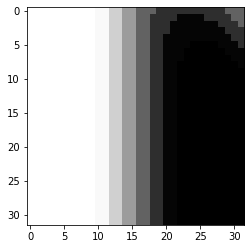

{'TileName': 'H23', 'XCoord': '6', 'YCoord': '12', 'SolidFlags': 'BSD', 'EdgeUp': 'ECOR_RIGHTT', 'EdgeDown': 'SOLID', 'EdgeLeft': 'HALF_DOWN', 'EdgeRight': 'OCOR_UPT', 'Fill': '55', 'Comment': 'Close Corners', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F1580C40>}


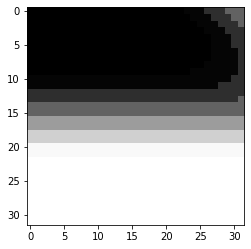

{'TileName': 'H24', 'XCoord': '6', 'YCoord': '13', 'SolidFlags': 'BSU', 'EdgeUp': 'SOLID', 'EdgeDown': 'ECOR_RIGHTT', 'EdgeLeft': 'HALF_UP', 'EdgeRight': 'OCOR_DOWNT', 'Fill': '55', 'Comment': 'Close Corners', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F1580B20>}


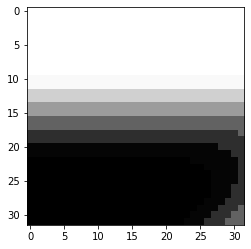

{'TileName': 'H25', 'XCoord': '21', 'YCoord': '6', 'SolidFlags': 'BSL', 'EdgeUp': 'HALF_LEFT', 'EdgeDown': 'OCOR_RIGHTT', 'EdgeLeft': 'SOLID', 'EdgeRight': 'ECOR_DOWNT', 'Fill': '55', 'Comment': 'Close Corners', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F1580A60>}


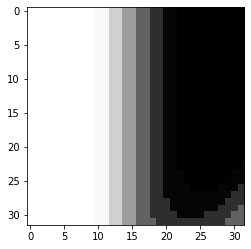

{'TileName': 'H26', 'XCoord': '20', 'YCoord': '6', 'SolidFlags': 'BSR', 'EdgeUp': 'HALF_RIGHT', 'EdgeDown': 'OCOR_LEFTT', 'EdgeLeft': 'ECOR_DOWNT', 'EdgeRight': 'SOLID', 'Fill': '55', 'Comment': 'Close Corners', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F1580EE0>}


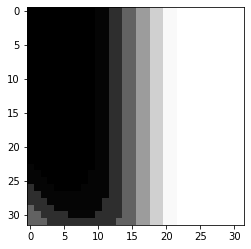

{'TileName': 'H27', 'XCoord': '2', 'YCoord': '13', 'SolidFlags': 'BSU', 'EdgeUp': 'SOLID', 'EdgeDown': 'ECOR_LEFTT', 'EdgeLeft': 'OCOR_DOWNT', 'EdgeRight': 'HALF_UP', 'Fill': '55', 'Comment': 'Close Corners', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F1580D90>}


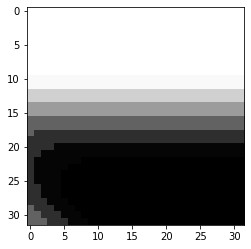

{'TileName': 'H28', 'XCoord': '2', 'YCoord': '12', 'SolidFlags': 'BSD', 'EdgeUp': 'ECOR_LEFTT', 'EdgeDown': 'SOLID', 'EdgeLeft': 'OCOR_UPT', 'EdgeRight': 'HALF_DOWN', 'Fill': '55', 'Comment': 'Close Corners', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F15802B0>}


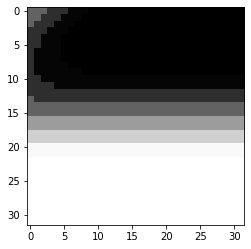

{'TileName': 'I11', 'XCoord': '12', 'YCoord': '9', 'SolidFlags': 'BEU+BER+BSD+BEL', 'EdgeUp': 'EMPTY', 'EdgeDown': 'SBICORNERN', 'EdgeLeft': 'ECOR_DOWNN', 'EdgeRight': 'ECOR_DOWNN', 'Fill': '20', 'Comment': 'Oblique Corners', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F15801F0>}


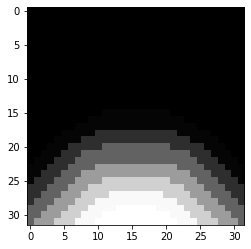

{'TileName': 'I12', 'XCoord': '24', 'YCoord': '12', 'SolidFlags': 'BEU+BER+BED+BSL', 'EdgeUp': 'ECOR_LEFTN', 'EdgeDown': 'ECOR_LEFTN', 'EdgeLeft': 'SBICORNERN', 'EdgeRight': 'EMPTY', 'Fill': '20', 'Comment': 'Oblique Corners', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F1580550>}


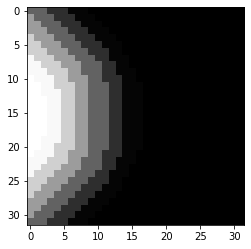

{'TileName': 'I13', 'XCoord': '12', 'YCoord': '16', 'SolidFlags': 'BSU+BER+BED+BEL', 'EdgeUp': 'SBICORNERN', 'EdgeDown': 'EMPTY', 'EdgeLeft': 'ECOR_UPN', 'EdgeRight': 'ECOR_UPN', 'Fill': '20', 'Comment': 'Oblique Corners', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F1562040>}


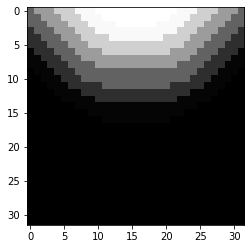

{'TileName': 'I14', 'XCoord': '17', 'YCoord': '12', 'SolidFlags': 'BEU+BSR+BED+BEL', 'EdgeUp': 'ECOR_RIGHTN', 'EdgeDown': 'ECOR_RIGHTN', 'EdgeLeft': 'EMPTY', 'EdgeRight': 'SBICORNERN', 'Fill': '20', 'Comment': 'Oblique Corners', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F1562820>}


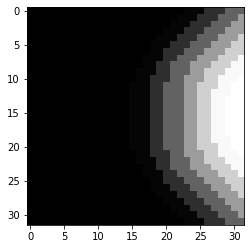

{'TileName': 'I21', 'XCoord': '4', 'YCoord': '9', 'SolidFlags': 'BSU+BSR+BED+BSL', 'EdgeUp': 'SOLID', 'EdgeDown': 'EBICORNERN', 'EdgeLeft': 'SCOR_DOWNN', 'EdgeRight': 'SCOR_DOWNN', 'Fill': '80', 'Comment': 'Oblique Corners', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F1562940>}


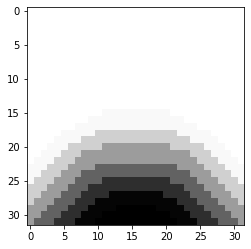

{'TileName': 'I22', 'XCoord': '24', 'YCoord': '4', 'SolidFlags': 'BSU+BSR+BSD+BEL', 'EdgeUp': 'SCOR_LEFTN', 'EdgeDown': 'SCOR_LEFTN', 'EdgeLeft': 'EBICORNERN', 'EdgeRight': 'SOLID', 'Fill': '80', 'Comment': 'Oblique Corners', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F1562B50>}


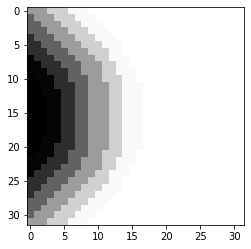

{'TileName': 'I23', 'XCoord': '4', 'YCoord': '16', 'SolidFlags': 'BEU+BSR+BSD+BSL', 'EdgeUp': 'EBICORNERN', 'EdgeDown': 'SOLID', 'EdgeLeft': 'SCOR_UPN', 'EdgeRight': 'SCOR_UPN', 'Fill': '80', 'Comment': 'Oblique Corners', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F1562D30>}


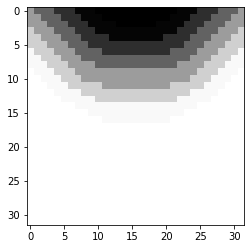

{'TileName': 'I24', 'XCoord': '17', 'YCoord': '4', 'SolidFlags': 'BSU+BER+BSD+BSL', 'EdgeUp': 'ECOR_RIGHTN', 'EdgeDown': 'ECOR_RIGHTN', 'EdgeLeft': 'SOLID', 'EdgeRight': 'EBICORNERN', 'Fill': '80', 'Comment': 'Oblique Corners', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F1562E20>}


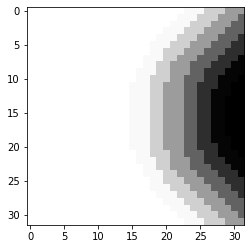

{'TileName': 'J11', 'XCoord': '12', 'YCoord': '10', 'SolidFlags': 'BE', 'EdgeUp': 'SBICORNERT', 'EdgeDown': 'SOLID', 'EdgeLeft': 'SCOR_UPT', 'EdgeRight': 'SCOR_UPT', 'Fill': '90', 'Comment': 'Oblique Corners', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F1562DC0>}


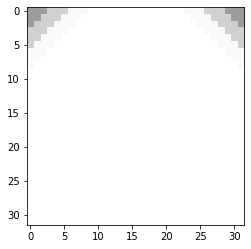

{'TileName': 'J12', 'XCoord': '23', 'YCoord': '12', 'SolidFlags': 'BE', 'EdgeUp': 'SCOR_RIGHTT', 'EdgeDown': 'SCOR_RIGHTT', 'EdgeLeft': 'SOLID', 'EdgeRight': 'SBICORNERT', 'Fill': '90', 'Comment': 'Oblique Corners', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F1562430>}


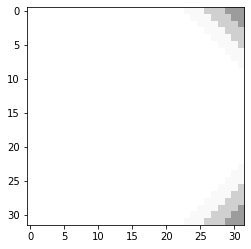

{'TileName': 'J13', 'XCoord': '12', 'YCoord': '15', 'SolidFlags': 'BE', 'EdgeUp': 'SOLID', 'EdgeDown': 'SBICORNERT', 'EdgeLeft': 'SCOR_DOWNT', 'EdgeRight': 'SCOR_DOWNT', 'Fill': '90', 'Comment': 'Oblique Corners', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F1562BB0>}


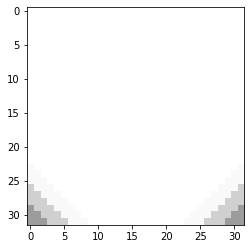

{'TileName': 'J14', 'XCoord': '18', 'YCoord': '12', 'SolidFlags': 'BE', 'EdgeUp': 'SCOR_LEFTT', 'EdgeDown': 'SCOR_LEFTT', 'EdgeLeft': 'SBICORNERT', 'EdgeRight': 'SOLID', 'Fill': '90', 'Comment': 'Oblique Corners', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F1562A00>}


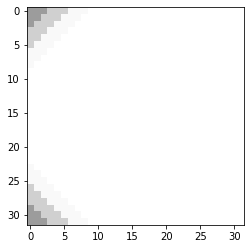

{'TileName': 'J21', 'XCoord': '4', 'YCoord': '10', 'SolidFlags': 'BS', 'EdgeUp': 'EBICORNERT', 'EdgeDown': 'EMPTY', 'EdgeLeft': 'ECOR_UPT', 'EdgeRight': 'ECOR_UPT', 'Fill': '10', 'Comment': 'Oblique Corners', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F1562DF0>}


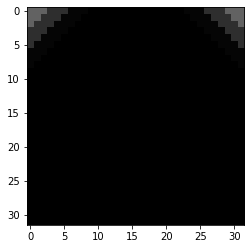

{'TileName': 'J22', 'XCoord': '23', 'YCoord': '4', 'SolidFlags': 'BS', 'EdgeUp': 'ECOR_RIGHTT', 'EdgeDown': 'ECOR_RIGHTT', 'EdgeLeft': 'EMPTY', 'EdgeRight': 'EBICORNERT', 'Fill': '10', 'Comment': 'Oblique Corners', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F15627C0>}


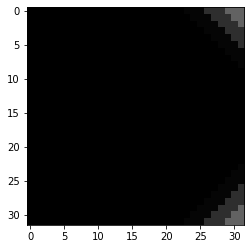

{'TileName': 'J23', 'XCoord': '4', 'YCoord': '15', 'SolidFlags': 'BS', 'EdgeUp': 'EMPTY', 'EdgeDown': 'EBICORNERT', 'EdgeLeft': 'ECOR_DOWNT', 'EdgeRight': 'ECOR_DOWNT', 'Fill': '10', 'Comment': 'Oblique Corners', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F15626A0>}


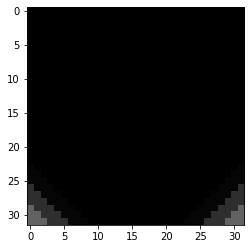

{'TileName': 'J24', 'XCoord': '18', 'YCoord': '4', 'SolidFlags': 'BS', 'EdgeUp': 'ECOR_LEFTT', 'EdgeDown': 'ECOR_LEFTT', 'EdgeLeft': 'EBICORNERT', 'EdgeRight': 'EMPTY', 'Fill': '10', 'Comment': 'Oblique Corners', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F1562310>}


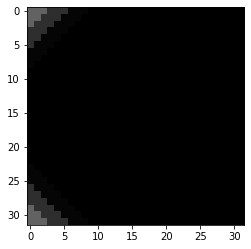

{'TileName': 'K1', 'XCoord': '6', 'YCoord': '18', 'SolidFlags': 'BE', 'EdgeUp': 'EBICORNERT', 'EdgeDown': 'EBICORNERT', 'EdgeLeft': 'EBICORNERT', 'EdgeRight': 'EBICORNERT', 'Fill': '80', 'Comment': 'Singularities', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F1562070>}


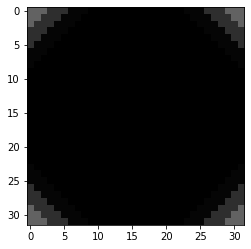

{'TileName': 'K2', 'XCoord': '14', 'YCoord': '18', 'SolidFlags': 'BS', 'EdgeUp': 'SBICORNERT', 'EdgeDown': 'SBICORNERT', 'EdgeLeft': 'SBICORNERT', 'EdgeRight': 'SBICORNERT', 'Fill': '20', 'Comment': 'Singularities', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F1562400>}


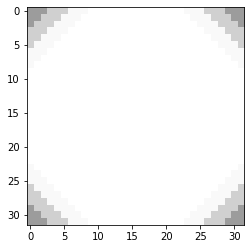

{'TileName': 'L11', 'XCoord': '26', 'YCoord': '2', 'SolidFlags': 'BSD', 'EdgeUp': 'EBICORNERT', 'EdgeDown': 'SOLID', 'EdgeLeft': 'OCOR_UPT', 'EdgeRight': 'OCOR_UPT', 'Fill': '60', 'Comment': 'Singularities', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F15627F0>}


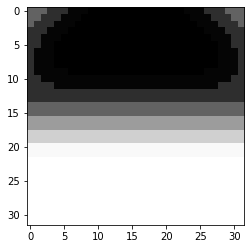

{'TileName': 'L12', 'XCoord': '3', 'YCoord': '18', 'SolidFlags': 'BSL', 'EdgeUp': 'OCOR_RIGHTT', 'EdgeDown': 'OCOR_RIGHTT', 'EdgeLeft': 'SOLID', 'EdgeRight': 'EBICORNERT', 'Fill': '60', 'Comment': 'Singularities', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F1580820>}


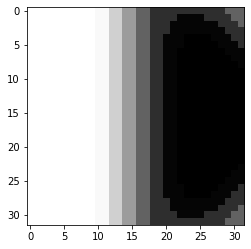

{'TileName': 'L13', 'XCoord': '26', 'YCoord': '3', 'SolidFlags': 'BSU', 'EdgeUp': 'SOLID', 'EdgeDown': 'EBICORNERT', 'EdgeLeft': 'OCOR_DOWNT', 'EdgeRight': 'OCOR_DOWNT', 'Fill': '60', 'Comment': 'Singularities', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F1580070>}


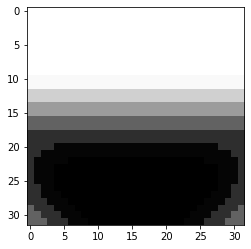

{'TileName': 'L14', 'XCoord': '2', 'YCoord': '18', 'SolidFlags': 'BSR', 'EdgeUp': 'OCOR_LEFTT', 'EdgeDown': 'OCOR_LEFTT', 'EdgeLeft': 'EBICORNERT', 'EdgeRight': 'SOLID', 'Fill': '60', 'Comment': 'Singularities', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F15801C0>}


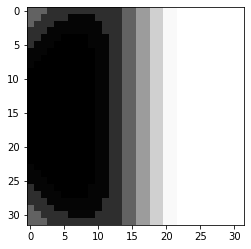

{'TileName': 'L21', 'XCoord': '26', 'YCoord': '10', 'SolidFlags': 'BED', 'EdgeUp': 'SBICORNERT', 'EdgeDown': 'EMPTY', 'EdgeLeft': 'HCOR_UPT', 'EdgeRight': 'HCOR_UPT', 'Fill': '40', 'Comment': 'Singularities', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F1580D60>}


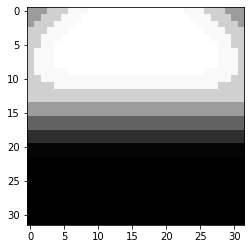

{'TileName': 'L22', 'XCoord': '11', 'YCoord': '18', 'SolidFlags': 'BEL', 'EdgeUp': 'HCOR_RIGHTT', 'EdgeDown': 'HCOR_RIGHTT', 'EdgeLeft': 'EMPTY', 'EdgeRight': 'SBICORNERT', 'Fill': '40', 'Comment': 'Singularities', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F1580E50>}


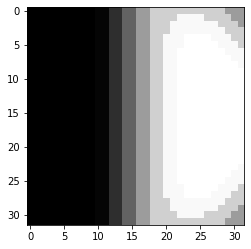

{'TileName': 'L23', 'XCoord': '26', 'YCoord': '11', 'SolidFlags': 'BEU', 'EdgeUp': 'EMPTY', 'EdgeDown': 'SBICORNERT', 'EdgeLeft': 'HCOR_DOWNT', 'EdgeRight': 'HCOR_DOWNT', 'Fill': '40', 'Comment': 'Singularities', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F1580FD0>}


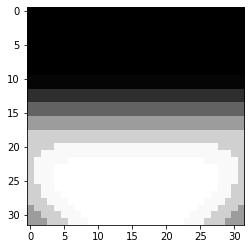

{'TileName': 'L24', 'XCoord': '10', 'YCoord': '18', 'SolidFlags': 'BER', 'EdgeUp': 'HCOR_LEFTT', 'EdgeDown': 'HCOR_LEFTT', 'EdgeLeft': 'SBICORNERT', 'EdgeRight': 'EMPTY', 'Fill': '40', 'Comment': 'Singularities', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F1580B80>}


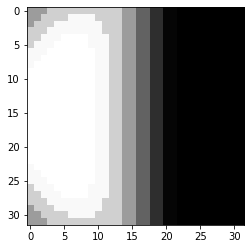

In [7]:
for tile_info in tiles_info:
    print(tile_info)
    hpos, vpos = int(tile_info['XCoord']), int(tile_info['YCoord'])
    if not tile_info['img'] is None:
        plt.imshow(tile_info['img'].convert('RGBA'))
        plt.show()

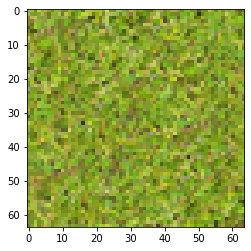

In [8]:
tx_h, tx_w = 64, 64
texture = Image.open('grass.jpg').convert('RGBA').resize((tx_h, tx_w), Image.ANTIALIAS)
plt.imshow(texture)
plt.show()

{'TileName': 'A1', 'XCoord': '12', 'YCoord': '4', 'SolidFlags': 'BE+BEU+BED+BER+BEL', 'EdgeUp': 'EMPTY', 'EdgeDown': 'EMPTY', 'EdgeLeft': 'EMPTY', 'EdgeRight': 'EMPTY', 'Fill': '0', 'Comment': 'Standard', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F15B56A0>}


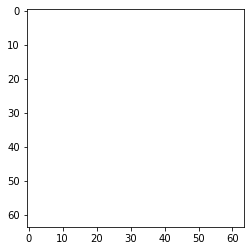

{'TileName': 'A2', 'XCoord': '4', 'YCoord': '4', 'SolidFlags': 'BS+BSU+BSD+BSR+BSL', 'EdgeUp': 'SOLID', 'EdgeDown': 'SOLID', 'EdgeLeft': 'SOLID', 'EdgeRight': 'SOLID', 'Fill': '100', 'Comment': 'Standard', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F15B57F0>}


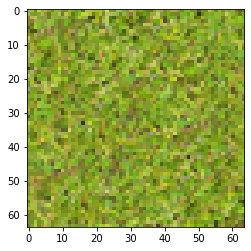

{'TileName': 'B1', 'XCoord': '12', 'YCoord': '5', 'SolidFlags': 'BEU+BSD', 'EdgeUp': 'EMPTY', 'EdgeDown': 'SOLID', 'EdgeLeft': 'HALF_DOWN', 'EdgeRight': 'HALF_DOWN', 'Fill': '50', 'Comment': 'Standard', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F15B5850>}


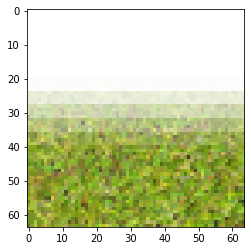

{'TileName': 'B2', 'XCoord': '11', 'YCoord': '4', 'SolidFlags': 'BER+BSL', 'EdgeUp': 'HALF_LEFT', 'EdgeDown': 'HALF_LEFT', 'EdgeLeft': 'SOLID', 'EdgeRight': 'EMPTY', 'Fill': '50', 'Comment': 'Standard', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F15B5D90>}


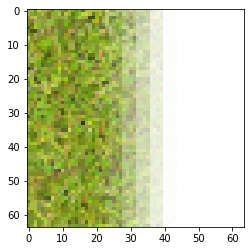

{'TileName': 'B3', 'XCoord': '12', 'YCoord': '3', 'SolidFlags': 'BED+BSU', 'EdgeUp': 'SOLID', 'EdgeDown': 'EMPTY', 'EdgeLeft': 'HALF_UP', 'EdgeRight': 'HALF_UP', 'Fill': '50', 'Comment': 'Standard', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F15B5CA0>}


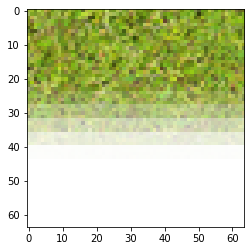

{'TileName': 'B4', 'XCoord': '13', 'YCoord': '4', 'SolidFlags': 'BEL+BSR', 'EdgeUp': 'HALF_RIGHT', 'EdgeDown': 'HALF_RIGHT', 'EdgeLeft': 'EMPTY', 'EdgeRight': 'SOLID', 'Fill': '50', 'Comment': 'Standard', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F15A2E20>}


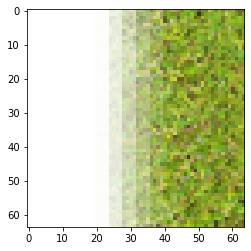

{'TileName': 'C11', 'XCoord': '3', 'YCoord': '3', 'SolidFlags': 'BEU+BEL', 'EdgeUp': 'EMPTY', 'EdgeDown': 'HALF_RIGHT', 'EdgeLeft': 'EMPTY', 'EdgeRight': 'HALF_DOWN', 'Fill': '25', 'Comment': 'Standard', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F15A26A0>}


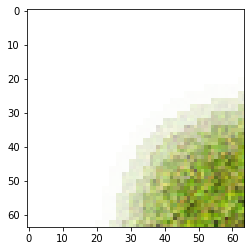

{'TileName': 'C12', 'XCoord': '5', 'YCoord': '3', 'SolidFlags': 'BEU+BER', 'EdgeUp': 'EMPTY', 'EdgeDown': 'HALF_LEFT', 'EdgeLeft': 'HALF_DOWN', 'EdgeRight': 'EMPTY', 'Fill': '25', 'Comment': 'Standard', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F15A26D0>}


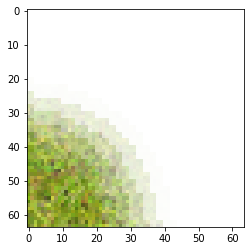

{'TileName': 'C13', 'XCoord': '5', 'YCoord': '5', 'SolidFlags': 'BED+BER', 'EdgeUp': 'HALF_LEFT', 'EdgeDown': 'EMPTY', 'EdgeLeft': 'HALF_UP', 'EdgeRight': 'EMPTY', 'Fill': '25', 'Comment': 'Standard', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F15A2E80>}


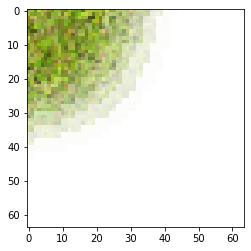

{'TileName': 'C14', 'XCoord': '3', 'YCoord': '5', 'SolidFlags': 'BED+BEL', 'EdgeUp': 'HALF_RIGHT', 'EdgeDown': 'EMPTY', 'EdgeLeft': 'EMPTY', 'EdgeRight': 'HALF_UP', 'Fill': '25', 'Comment': 'Standard', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F15A2B20>}


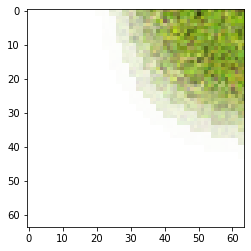

{'TileName': 'C21', 'XCoord': '11', 'YCoord': '3', 'SolidFlags': 'BSU+BSL', 'EdgeUp': 'SOLID', 'EdgeDown': 'HALF_LEFT', 'EdgeLeft': 'SOLID', 'EdgeRight': 'HALF_UP', 'Fill': '75', 'Comment': 'Standard', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F15A2CD0>}


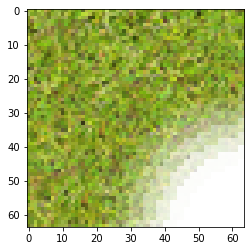

{'TileName': 'C22', 'XCoord': '13', 'YCoord': '3', 'SolidFlags': 'BSU+BSR', 'EdgeUp': 'SOLID', 'EdgeDown': 'HALF_RIGHT', 'EdgeLeft': 'HALF_UP', 'EdgeRight': 'SOLID', 'Fill': '75', 'Comment': 'Standard', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F15A2AF0>}


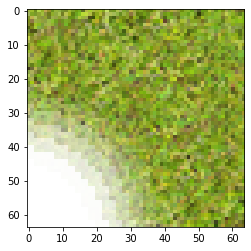

{'TileName': 'C23', 'XCoord': '13', 'YCoord': '5', 'SolidFlags': 'BSD+BSR', 'EdgeUp': 'HALF_RIGHT', 'EdgeDown': 'SOLID', 'EdgeLeft': 'HALF_DOWN', 'EdgeRight': 'SOLID', 'Fill': '75', 'Comment': 'Standard', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F15A2610>}


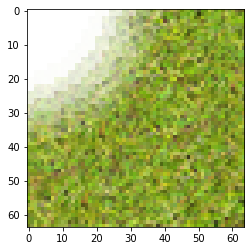

{'TileName': 'C24', 'XCoord': '11', 'YCoord': '5', 'SolidFlags': 'BSD+BSL', 'EdgeUp': 'HALF_LEFT', 'EdgeDown': 'SOLID', 'EdgeLeft': 'SOLID', 'EdgeRight': 'HALF_DOWN', 'Fill': '75', 'Comment': 'Standard', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F15A2310>}


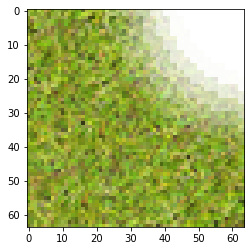

{'TileName': 'D11', 'XCoord': '11', 'YCoord': '1', 'SolidFlags': 'BSD+BEU', 'EdgeUp': 'EMPTY', 'EdgeDown': 'SCOR_LEFTN', 'EdgeLeft': 'ECOR_DOWNN', 'EdgeRight': 'HALF_DOWN', 'Fill': '35', 'Comment': 'Open Corners', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F15A22E0>}


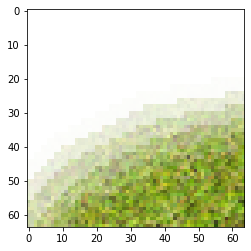

{'TileName': 'D12', 'XCoord': '13', 'YCoord': '1', 'SolidFlags': 'BSD+BEU', 'EdgeUp': 'EMPTY', 'EdgeDown': 'SCOR_RIGHTN', 'EdgeLeft': 'HALF_DOWN', 'EdgeRight': 'ECOR_DOWNN', 'Fill': '35', 'Comment': 'Open Corners', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F15A2D30>}


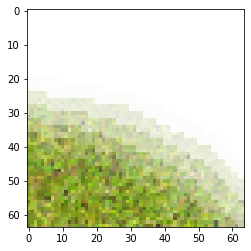

{'TileName': 'D13', 'XCoord': '15', 'YCoord': '3', 'SolidFlags': 'BSL+BER', 'EdgeUp': 'ECOR_LEFTN', 'EdgeDown': 'HALF_LEFT', 'EdgeLeft': 'SCOR_UPN', 'EdgeRight': 'EMPTY', 'Fill': '35', 'Comment': 'Open Corners', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F15A28B0>}


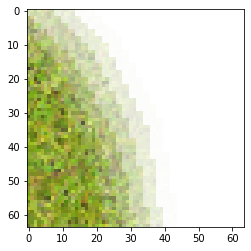

{'TileName': 'D14', 'XCoord': '15', 'YCoord': '5', 'SolidFlags': 'BSL+BER', 'EdgeUp': 'HALF_LEFT', 'EdgeDown': 'ECOR_LEFTN', 'EdgeLeft': 'SCOR_DOWNN', 'EdgeRight': 'EMPTY', 'Fill': '35', 'Comment': 'Open Corners', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F15A2880>}


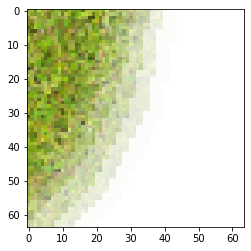

{'TileName': 'D15', 'XCoord': '13', 'YCoord': '7', 'SolidFlags': 'BSU+BED', 'EdgeUp': 'SCOR_RIGHTN', 'EdgeDown': 'EMPTY', 'EdgeLeft': 'HALF_UP', 'EdgeRight': 'ECOR_UPN', 'Fill': '35', 'Comment': 'Open Corners', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F15A2190>}


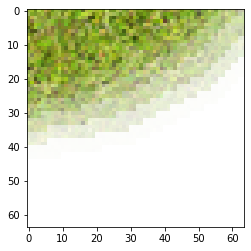

{'TileName': 'D16', 'XCoord': '11', 'YCoord': '7', 'SolidFlags': 'BSU+BED', 'EdgeUp': 'SCOR_LEFTN', 'EdgeDown': 'EMPTY', 'EdgeLeft': 'ECOR_UPN', 'EdgeRight': 'HALF_UP', 'Fill': '35', 'Comment': 'Open Corners', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F15A2790>}


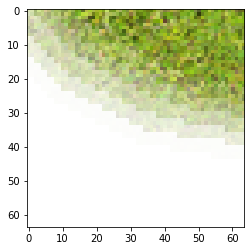

{'TileName': 'D17', 'XCoord': '9', 'YCoord': '5', 'SolidFlags': 'BSR+BEL', 'EdgeUp': 'HALF_RIGHT', 'EdgeDown': 'ECOR_RIGHTN', 'EdgeLeft': 'EMPTY', 'EdgeRight': 'SCOR_DOWNN', 'Fill': '35', 'Comment': 'Open Corners', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F15A23A0>}


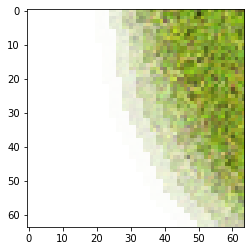

{'TileName': 'D18', 'XCoord': '9', 'YCoord': '3', 'SolidFlags': 'BSR+BEL', 'EdgeUp': 'ECOR_RIGHTN', 'EdgeDown': 'HALF_RIGHT', 'EdgeLeft': 'EMPTY', 'EdgeRight': 'SCOR_UPN', 'Fill': '35', 'Comment': 'Open Corners', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F15808B0>}


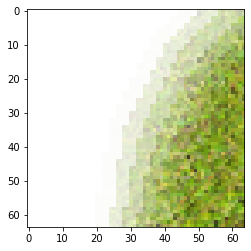

{'TileName': 'D21', 'XCoord': '3', 'YCoord': '1', 'SolidFlags': 'BED+BSU', 'EdgeUp': 'SOLID', 'EdgeDown': 'ECOR_LEFTN', 'EdgeLeft': 'SCOR_DOWNN', 'EdgeRight': 'HALF_UP', 'Fill': '65', 'Comment': 'Open Corners', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F1580940>}


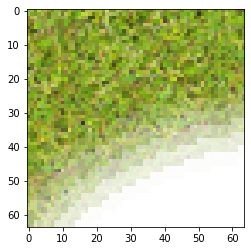

{'TileName': 'D22', 'XCoord': '5', 'YCoord': '1', 'SolidFlags': 'BED+BSU', 'EdgeUp': 'SOLID', 'EdgeDown': 'ECOR_RIGHTN', 'EdgeLeft': 'HALF_UP', 'EdgeRight': 'SCOR_UPN', 'Fill': '65', 'Comment': 'Open Corners', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F1580430>}


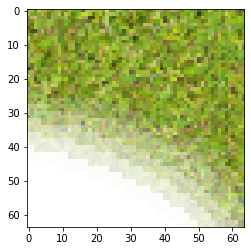

{'TileName': 'D23', 'XCoord': '7', 'YCoord': '3', 'SolidFlags': 'BEL+BSR', 'EdgeUp': 'SCOR_LEFTN', 'EdgeDown': 'HALF_RIGHT', 'EdgeLeft': 'ECOR_UPN', 'EdgeRight': 'SOLID', 'Fill': '65', 'Comment': 'Open Corners', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F1580040>}


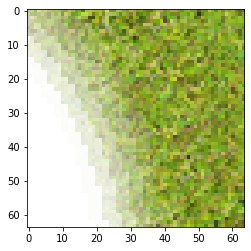

{'TileName': 'D24', 'XCoord': '7', 'YCoord': '5', 'SolidFlags': 'BEL+BSR', 'EdgeUp': 'HALF_RIGHT', 'EdgeDown': 'SCOR_LEFTN', 'EdgeLeft': 'ECOR_DOWNN', 'EdgeRight': 'SOLID', 'Fill': '65', 'Comment': 'Open Corners', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F1580100>}


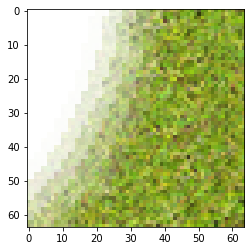

{'TileName': 'D25', 'XCoord': '5', 'YCoord': '7', 'SolidFlags': 'BEU+BSD', 'EdgeUp': 'ECOR_RIGHTN', 'EdgeDown': 'SOLID', 'EdgeLeft': 'HALF_DOWN', 'EdgeRight': 'SCOR_UPN', 'Fill': '65', 'Comment': 'Open Corners', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F1580220>}


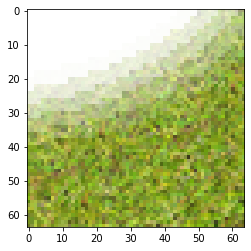

{'TileName': 'D26', 'XCoord': '3', 'YCoord': '7', 'SolidFlags': 'BEU+BSD', 'EdgeUp': 'ECOR_LEFTN', 'EdgeDown': 'SOLID', 'EdgeLeft': 'SCOR_UPN', 'EdgeRight': 'HALF_DOWN', 'Fill': '65', 'Comment': 'Open Corners', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F1580340>}


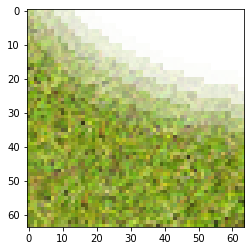

{'TileName': 'D27', 'XCoord': '1', 'YCoord': '5', 'SolidFlags': 'BER+BSL', 'EdgeUp': 'HALF_LEFT', 'EdgeDown': 'SCOR_RIGHTN', 'EdgeLeft': 'SOLID', 'EdgeRight': 'ECOR_DOWNN', 'Fill': '65', 'Comment': 'Open Corners', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F1580DF0>}


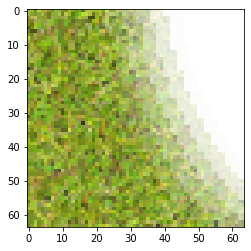

{'TileName': 'D28', 'XCoord': '1', 'YCoord': '3', 'SolidFlags': 'BER+BSL', 'EdgeUp': 'SCOR_RIGHTN', 'EdgeDown': 'HALF_LEFT', 'EdgeLeft': 'SOLID', 'EdgeRight': 'ECOR_UPN', 'Fill': '65', 'Comment': 'Open Corners', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F1580EB0>}


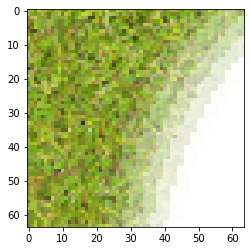

{'TileName': 'E1', 'XCoord': '10', 'YCoord': '2', 'SolidFlags': 'BEU+BSR+BSD+BEL', 'EdgeUp': 'ECOR_RIGHTN', 'EdgeDown': 'SCOR_LEFTN', 'EdgeLeft': 'ECOR_DOWNN', 'EdgeRight': 'SCOR_UPN', 'Fill': '50', 'Comment': 'Oblique Tiles', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F1580FA0>}


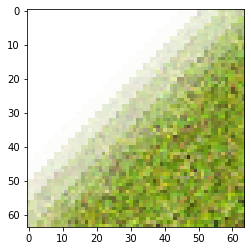

{'TileName': 'E2', 'XCoord': '14', 'YCoord': '2', 'SolidFlags': 'BEU+BER+BSD+BSL', 'EdgeUp': 'ECOR_LEFTN', 'EdgeDown': 'SCOR_RIGHTN', 'EdgeLeft': 'SCOR_UPN', 'EdgeRight': 'ECOR_DOWNN', 'Fill': '50', 'Comment': 'Oblique Tiles', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F1580AF0>}


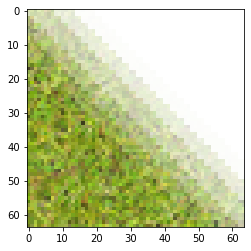

{'TileName': 'E3', 'XCoord': '14', 'YCoord': '6', 'SolidFlags': 'BSU+BER+BED+BSL', 'EdgeUp': 'SCOR_RIGHTN', 'EdgeDown': 'ECOR_LEFTN', 'EdgeLeft': 'SCOR_DOWNN', 'EdgeRight': 'ECOR_UPN', 'Fill': '50', 'Comment': 'Oblique Tiles', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F1580BB0>}


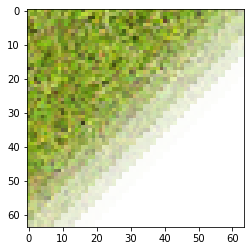

{'TileName': 'E4', 'XCoord': '10', 'YCoord': '6', 'SolidFlags': 'BSU+BSR+BED+BEL', 'EdgeUp': 'SCOR_LEFTN', 'EdgeDown': 'ECOR_RIGHTN', 'EdgeLeft': 'ECOR_UPN', 'EdgeRight': 'SCOR_DOWNN', 'Fill': '50', 'Comment': 'Oblique Tiles', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F1580CA0>}


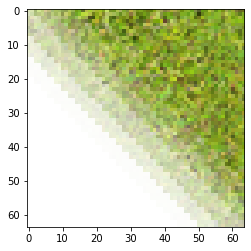

{'TileName': 'F11', 'XCoord': '14', 'YCoord': '7', 'SolidFlags': 'BE+BEU+BED+BER+BEL', 'EdgeUp': 'ECOR_LEFTT', 'EdgeDown': 'EMPTY', 'EdgeLeft': 'ECOR_UPT', 'EdgeRight': 'EMPTY', 'Fill': '5', 'Comment': 'Oblique Tiles', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F15804F0>}


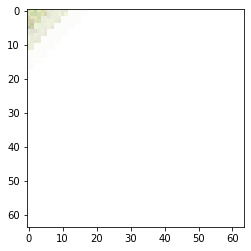

{'TileName': 'F12', 'XCoord': '10', 'YCoord': '7', 'SolidFlags': 'BE+BEU+BED+BER+BEL', 'EdgeUp': 'ECOR_RIGHTT', 'EdgeDown': 'EMPTY', 'EdgeLeft': 'EMPTY', 'EdgeRight': 'ECOR_UPT', 'Fill': '5', 'Comment': 'Oblique Tiles', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F1580700>}


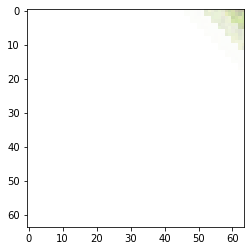

{'TileName': 'F13', 'XCoord': '10', 'YCoord': '1', 'SolidFlags': 'BE+BEU+BED+BER+BEL', 'EdgeUp': 'EMPTY', 'EdgeDown': 'ECOR_RIGHTT', 'EdgeLeft': 'EMPTY', 'EdgeRight': 'ECOR_DOWNT', 'Fill': '5', 'Comment': 'Oblique Tiles', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F15807C0>}


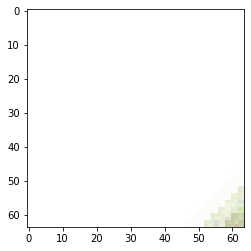

{'TileName': 'F14', 'XCoord': '14', 'YCoord': '1', 'SolidFlags': 'BE+BEU+BED+BER+BEL', 'EdgeUp': 'EMPTY', 'EdgeDown': 'ECOR_LEFTT', 'EdgeLeft': 'ECOR_DOWNT', 'EdgeRight': 'EMPTY', 'Fill': '5', 'Comment': 'Oblique Tiles', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F15620A0>}


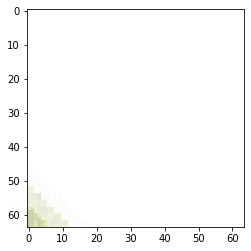

{'TileName': 'F15', 'XCoord': '3', 'YCoord': '11', 'SolidFlags': 'BE+BEU+BED+BER+BEL', 'EdgeUp': 'ECOR_LEFTT', 'EdgeDown': 'ECOR_RIGHTT', 'EdgeLeft': 'ECOR_UPT', 'EdgeRight': 'ECOR_DOWNT', 'Fill': '10', 'Comment': 'Oblique Tiles', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F1562AC0>}


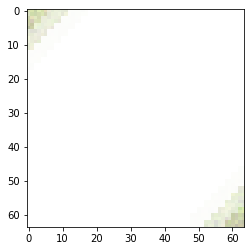

{'TileName': 'F16', 'XCoord': '5', 'YCoord': '11', 'SolidFlags': 'BE+BEU+BED+BER+BEL', 'EdgeUp': 'ECOR_RIGHTT', 'EdgeDown': 'ECOR_LEFTT', 'EdgeLeft': 'ECOR_DOWNT', 'EdgeRight': 'ECOR_UPT', 'Fill': '10', 'Comment': 'Oblique Tiles', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F15628E0>}


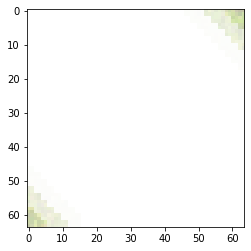

{'TileName': 'F21', 'XCoord': '10', 'YCoord': '3', 'SolidFlags': 'BS+BSU+BSD+BSR+BSL', 'EdgeUp': 'SCOR_LEFTT', 'EdgeDown': 'SOLID', 'EdgeLeft': 'SCOR_UPT', 'EdgeRight': 'SOLID', 'Fill': '95', 'Comment': 'Oblique Tiles', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F1562C10>}


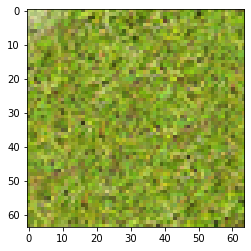

{'TileName': 'F22', 'XCoord': '14', 'YCoord': '3', 'SolidFlags': 'BS+BSU+BSD+BSR+BSL', 'EdgeUp': 'SCOR_RIGHTT', 'EdgeDown': 'SOLID', 'EdgeLeft': 'SOLID', 'EdgeRight': 'SCOR_UPT', 'Fill': '95', 'Comment': 'Oblique Tiles', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F1562BE0>}


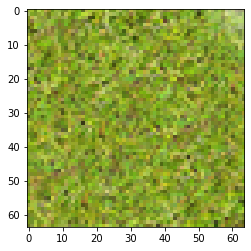

{'TileName': 'F23', 'XCoord': '14', 'YCoord': '5', 'SolidFlags': 'BS+BSU+BSD+BSR+BSL', 'EdgeUp': 'SOLID', 'EdgeDown': 'SCOR_RIGHTT', 'EdgeLeft': 'SOLID', 'EdgeRight': 'SCOR_DOWNT', 'Fill': '95', 'Comment': 'Oblique Tiles', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F1562AF0>}


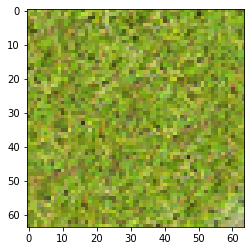

{'TileName': 'F24', 'XCoord': '10', 'YCoord': '5', 'SolidFlags': 'BS+BSU+BSD+BSR+BSL', 'EdgeUp': 'SOLID', 'EdgeDown': 'SCOR_LEFTT', 'EdgeLeft': 'SCOR_DOWNT', 'EdgeRight': 'SOLID', 'Fill': '95', 'Comment': 'Oblique Tiles', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F15621C0>}


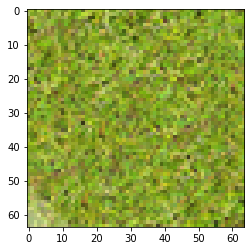

{'TileName': 'F25', 'XCoord': '11', 'YCoord': '11', 'SolidFlags': 'BS+BSU+BSD+BSR+BSL', 'EdgeUp': 'SCOR_LEFTT', 'EdgeDown': 'SCOR_RIGHTT', 'EdgeLeft': 'SCOR_UPT', 'EdgeRight': 'SCOR_DOWNT', 'Fill': '90', 'Comment': 'Oblique Tiles', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F1562D60>}


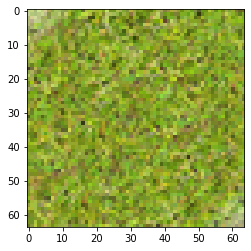

{'TileName': 'F26', 'XCoord': '13', 'YCoord': '11', 'SolidFlags': 'BS+BSU+BSD+BSR+BSL', 'EdgeUp': 'SCOR_RIGHTT', 'EdgeDown': 'SCOR_LEFTT', 'EdgeLeft': 'SCOR_DOWNT', 'EdgeRight': 'SCOR_UPT', 'Fill': '90', 'Comment': 'Oblique Tiles', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F1562FD0>}


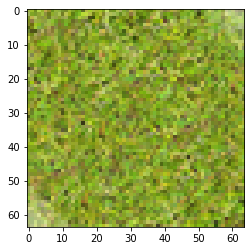

{'TileName': 'G11', 'XCoord': '20', 'YCoord': '9', 'SolidFlags': 'BEU+BER+BEL', 'EdgeUp': 'EMPTY', 'EdgeDown': 'HCOR_LEFTN', 'EdgeLeft': 'ECOR_DOWNN', 'EdgeRight': 'EMPTY', 'Fill': '15', 'Comment': 'Close Corners', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F1562F10>}


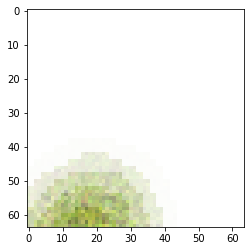

{'TileName': 'G12', 'XCoord': '21', 'YCoord': '9', 'SolidFlags': 'BEU+BER+BEL', 'EdgeUp': 'EMPTY', 'EdgeDown': 'HCOR_RIGHTN', 'EdgeLeft': 'EMPTY', 'EdgeRight': 'ECOR_DOWNN', 'Fill': '15', 'Comment': 'Close Corners', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F1562EB0>}


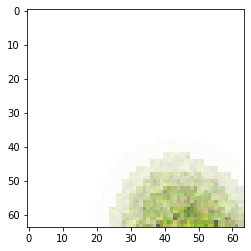

{'TileName': 'G13', 'XCoord': '15', 'YCoord': '12', 'SolidFlags': 'BER+BED+BEU', 'EdgeUp': 'ECOR_LEFTN', 'EdgeDown': 'EMPTY', 'EdgeLeft': 'HCOR_UPN', 'EdgeRight': 'EMPTY', 'Fill': '15', 'Comment': 'Close Corners', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F1562190>}


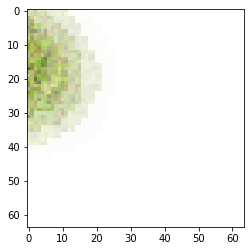

{'TileName': 'G14', 'XCoord': '15', 'YCoord': '13', 'SolidFlags': 'BER+BED+BEU', 'EdgeUp': 'EMPTY', 'EdgeDown': 'ECOR_LEFTN', 'EdgeLeft': 'HCOR_DOWNN', 'EdgeRight': 'EMPTY', 'Fill': '15', 'Comment': 'Close Corners', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F1562280>}


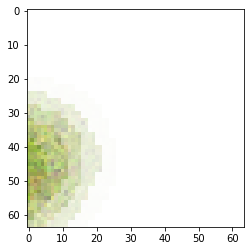

{'TileName': 'G15', 'XCoord': '21', 'YCoord': '15', 'SolidFlags': 'BED+BEL+BER', 'EdgeUp': 'HCOR_RIGHTN', 'EdgeDown': 'EMPTY', 'EdgeLeft': 'EMPTY', 'EdgeRight': 'ECOR_UPN', 'Fill': '15', 'Comment': 'Close Corners', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F15624F0>}


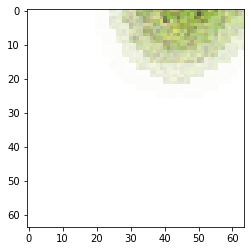

{'TileName': 'G16', 'XCoord': '20', 'YCoord': '15', 'SolidFlags': 'BED+BEL+BER', 'EdgeUp': 'HCOR_LEFTN', 'EdgeDown': 'EMPTY', 'EdgeLeft': 'ECOR_UPN', 'EdgeRight': 'EMPTY', 'Fill': '15', 'Comment': 'Close Corners', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F1562640>}


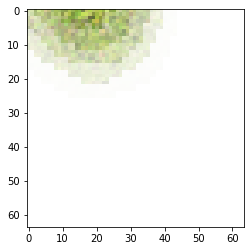

{'TileName': 'G17', 'XCoord': '9', 'YCoord': '13', 'SolidFlags': 'BEL+BEU+BED', 'EdgeUp': 'EMPTY', 'EdgeDown': 'HCOR_RIGHTN', 'EdgeLeft': 'EMPTY', 'EdgeRight': 'SCOR_DOWNN', 'Fill': '15', 'Comment': 'Close Corners', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F1562910>}


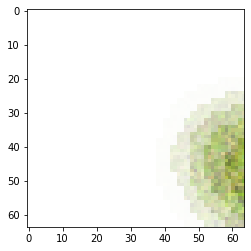

{'TileName': 'G18', 'XCoord': '9', 'YCoord': '12', 'SolidFlags': 'BEL+BEU+BED', 'EdgeUp': 'HCOR_RIGHTN', 'EdgeDown': 'EMPTY', 'EdgeLeft': 'EMPTY', 'EdgeRight': 'SCOR_UPN', 'Fill': '15', 'Comment': 'Close Corners', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F1562580>}


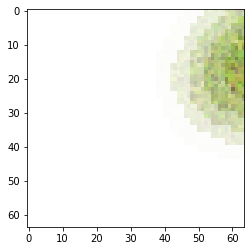

{'TileName': 'G21', 'XCoord': '20', 'YCoord': '1', 'SolidFlags': 'BSU+BSR+BSL', 'EdgeUp': 'SOLID', 'EdgeDown': 'OCOR_LEFTN', 'EdgeLeft': 'SCOR_DOWNN', 'EdgeRight': 'SOLID', 'Fill': '85', 'Comment': 'Close Corners', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F150AFD0>}


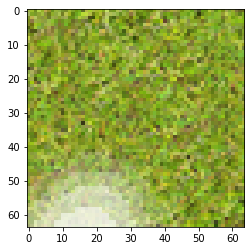

{'TileName': 'G22', 'XCoord': '21', 'YCoord': '1', 'SolidFlags': 'BSU+BSR+BSL', 'EdgeUp': 'SOLID', 'EdgeDown': 'OCOR_RIGHTN', 'EdgeLeft': 'SOLID', 'EdgeRight': 'SCOR_DOWNN', 'Fill': '85', 'Comment': 'Close Corners', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F150AA30>}


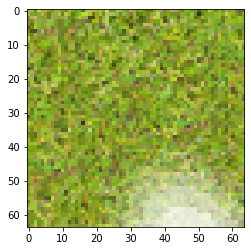

{'TileName': 'G23', 'XCoord': '7', 'YCoord': '12', 'SolidFlags': 'BSR+BSD+BSU', 'EdgeUp': 'SCOR_LEFTN', 'EdgeDown': 'SOLID', 'EdgeLeft': 'OCOR_UPN', 'EdgeRight': 'SOLID', 'Fill': '85', 'Comment': 'Close Corners', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F150A2B0>}


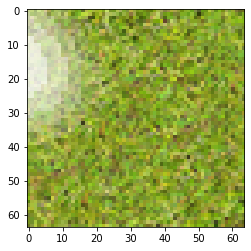

{'TileName': 'G24', 'XCoord': '7', 'YCoord': '13', 'SolidFlags': 'BSR+BSD+BSU', 'EdgeUp': 'SOLID', 'EdgeDown': 'SCOR_LEFTN', 'EdgeLeft': 'OCOR_DOWNN', 'EdgeRight': 'SOLID', 'Fill': '85', 'Comment': 'Close Corners', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F1562880>}


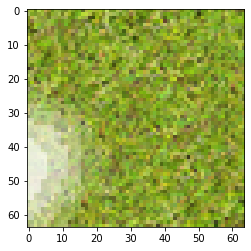

{'TileName': 'G25', 'XCoord': '21', 'YCoord': '7', 'SolidFlags': 'BSD+BSL+BSR', 'EdgeUp': 'OCOR_RIGHTN', 'EdgeDown': 'SOLID', 'EdgeLeft': 'SOLID', 'EdgeRight': 'SCOR_UPN', 'Fill': '85', 'Comment': 'Close Corners', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F1562610>}


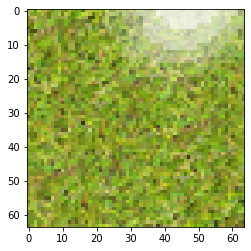

{'TileName': 'G26', 'XCoord': '20', 'YCoord': '7', 'SolidFlags': 'BSD+BSL+BSR', 'EdgeUp': 'OCOR_LEFTN', 'EdgeDown': 'SOLID', 'EdgeLeft': 'SCOR_UPN', 'EdgeRight': 'SOLID', 'Fill': '85', 'Comment': 'Close Corners', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F15622B0>}


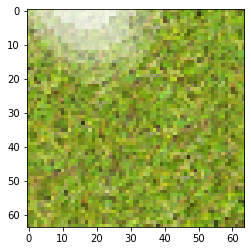

{'TileName': 'G27', 'XCoord': '1', 'YCoord': '13', 'SolidFlags': 'BSL+BSU+BSD', 'EdgeUp': 'SOLID', 'EdgeDown': 'SCOR_RIGHTN', 'EdgeLeft': 'SOLID', 'EdgeRight': 'OCOR_DOWNN', 'Fill': '85', 'Comment': 'Close Corners', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F1562E80>}


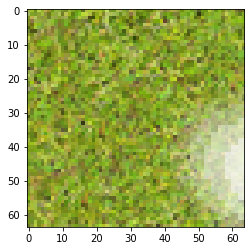

{'TileName': 'G28', 'XCoord': '1', 'YCoord': '12', 'SolidFlags': 'BSL+BSU+BSD', 'EdgeUp': 'SCOR_RIGHTN', 'EdgeDown': 'SOLID', 'EdgeLeft': 'SOLID', 'EdgeRight': 'OCOR_UPN', 'Fill': '85', 'Comment': 'Close Corners', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F1562F70>}


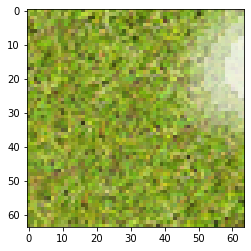

{'TileName': 'H11', 'XCoord': '20', 'YCoord': '10', 'SolidFlags': 'BER', 'EdgeUp': 'HCOR_LEFTT', 'EdgeDown': 'HALF_LEFT', 'EdgeLeft': 'SCOR_UPT', 'EdgeRight': 'EMPTY', 'Fill': '45', 'Comment': 'Close Corners', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F1562490>}


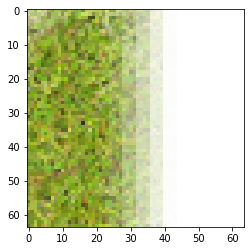

{'TileName': 'H12', 'XCoord': '21', 'YCoord': '10', 'SolidFlags': 'BEL', 'EdgeUp': 'HCOR_RIGHTT', 'EdgeDown': 'HALF_RIGHT', 'EdgeLeft': 'EMPTY', 'EdgeRight': 'SCOR_UPT', 'Fill': '45', 'Comment': 'Close Corners', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F1562D90>}


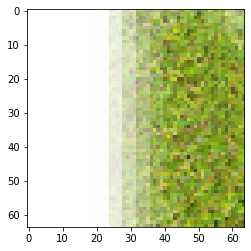

{'TileName': 'H13', 'XCoord': '14', 'YCoord': '12', 'SolidFlags': 'BED', 'EdgeUp': 'SCOR_RIGHTT', 'EdgeDown': 'EMPTY', 'EdgeLeft': 'HALF_UP', 'EdgeRight': 'HCOR_UPT', 'Fill': '45', 'Comment': 'Close Corners', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F1562CA0>}


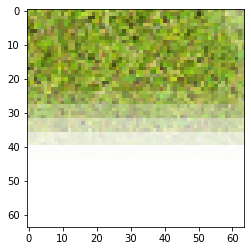

{'TileName': 'H14', 'XCoord': '14', 'YCoord': '13', 'SolidFlags': 'BEU', 'EdgeUp': 'EMPTY', 'EdgeDown': 'SCOR_RIGHTT', 'EdgeLeft': 'HALF_DOWN', 'EdgeRight': 'HCOR_DOWNT', 'Fill': '45', 'Comment': 'Close Corners', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F15E6100>}


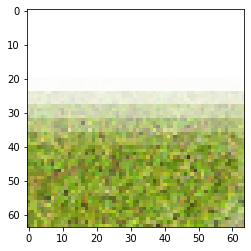

{'TileName': 'H15', 'XCoord': '21', 'YCoord': '14', 'SolidFlags': 'BEL', 'EdgeUp': 'HALF_RIGHT', 'EdgeDown': 'HCOR_RIGHTT', 'EdgeLeft': 'EMPTY', 'EdgeRight': 'SCOR_DOWNT', 'Fill': '45', 'Comment': 'Close Corners', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F1562970>}


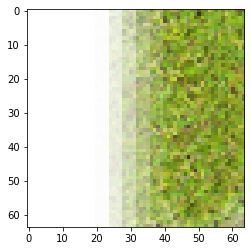

{'TileName': 'H16', 'XCoord': '20', 'YCoord': '14', 'SolidFlags': 'BER', 'EdgeUp': 'HALF_LEFT', 'EdgeDown': 'HCOR_LEFTT', 'EdgeLeft': 'SCOR_DOWNT', 'EdgeRight': 'EMPTY', 'Fill': '45', 'Comment': 'Close Corners', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F15628B0>}


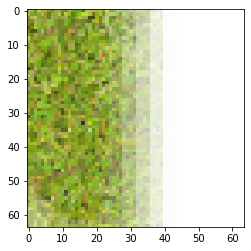

{'TileName': 'H17', 'XCoord': '10', 'YCoord': '13', 'SolidFlags': 'BEU', 'EdgeUp': 'EMPTY', 'EdgeDown': 'SCOR_LEFTT', 'EdgeLeft': 'HCOR_DOWNT', 'EdgeRight': 'HALF_DOWN', 'Fill': '45', 'Comment': 'Close Corners', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F1562700>}


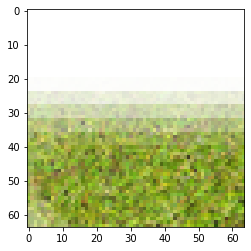

{'TileName': 'H18', 'XCoord': '10', 'YCoord': '12', 'SolidFlags': 'BED', 'EdgeUp': 'SCOR_LEFTT', 'EdgeDown': 'EMPTY', 'EdgeLeft': 'HCOR_UPT', 'EdgeRight': 'HALF_UP', 'Fill': '45', 'Comment': 'Close Corners', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F1580970>}


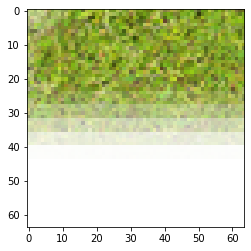

{'TileName': 'H21', 'XCoord': '20', 'YCoord': '2', 'SolidFlags': 'BSR', 'EdgeUp': 'OCOR_LEFTT', 'EdgeDown': 'HALF_RIGHT', 'EdgeLeft': 'ECOR_UPT', 'EdgeRight': 'SOLID', 'Fill': '55', 'Comment': 'Close Corners', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F1580730>}


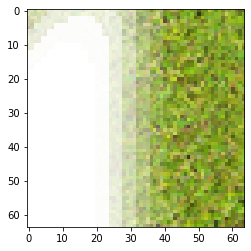

{'TileName': 'H22', 'XCoord': '21', 'YCoord': '2', 'SolidFlags': 'BSL', 'EdgeUp': 'OCOR_RIGHTT', 'EdgeDown': 'HALF_LEFT', 'EdgeLeft': 'SOLID', 'EdgeRight': 'ECOR_UPT', 'Fill': '55', 'Comment': 'Close Corners', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F15804C0>}


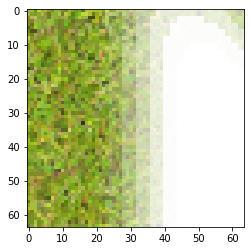

{'TileName': 'H23', 'XCoord': '6', 'YCoord': '12', 'SolidFlags': 'BSD', 'EdgeUp': 'ECOR_RIGHTT', 'EdgeDown': 'SOLID', 'EdgeLeft': 'HALF_DOWN', 'EdgeRight': 'OCOR_UPT', 'Fill': '55', 'Comment': 'Close Corners', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F1580C40>}


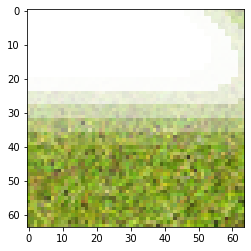

{'TileName': 'H24', 'XCoord': '6', 'YCoord': '13', 'SolidFlags': 'BSU', 'EdgeUp': 'SOLID', 'EdgeDown': 'ECOR_RIGHTT', 'EdgeLeft': 'HALF_UP', 'EdgeRight': 'OCOR_DOWNT', 'Fill': '55', 'Comment': 'Close Corners', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F1580B20>}


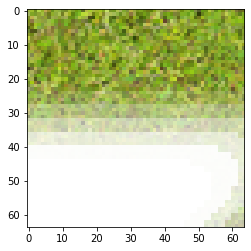

{'TileName': 'H25', 'XCoord': '21', 'YCoord': '6', 'SolidFlags': 'BSL', 'EdgeUp': 'HALF_LEFT', 'EdgeDown': 'OCOR_RIGHTT', 'EdgeLeft': 'SOLID', 'EdgeRight': 'ECOR_DOWNT', 'Fill': '55', 'Comment': 'Close Corners', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F1580A60>}


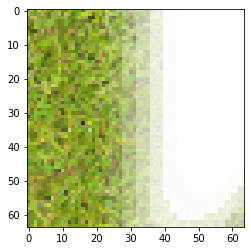

{'TileName': 'H26', 'XCoord': '20', 'YCoord': '6', 'SolidFlags': 'BSR', 'EdgeUp': 'HALF_RIGHT', 'EdgeDown': 'OCOR_LEFTT', 'EdgeLeft': 'ECOR_DOWNT', 'EdgeRight': 'SOLID', 'Fill': '55', 'Comment': 'Close Corners', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F1580EE0>}


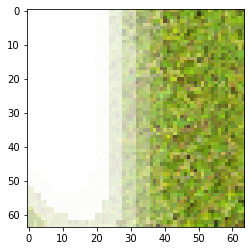

{'TileName': 'H27', 'XCoord': '2', 'YCoord': '13', 'SolidFlags': 'BSU', 'EdgeUp': 'SOLID', 'EdgeDown': 'ECOR_LEFTT', 'EdgeLeft': 'OCOR_DOWNT', 'EdgeRight': 'HALF_UP', 'Fill': '55', 'Comment': 'Close Corners', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F1580D90>}


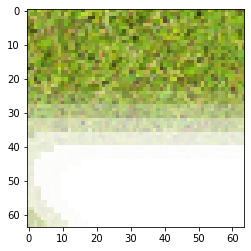

{'TileName': 'H28', 'XCoord': '2', 'YCoord': '12', 'SolidFlags': 'BSD', 'EdgeUp': 'ECOR_LEFTT', 'EdgeDown': 'SOLID', 'EdgeLeft': 'OCOR_UPT', 'EdgeRight': 'HALF_DOWN', 'Fill': '55', 'Comment': 'Close Corners', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F15802B0>}


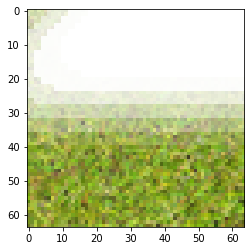

{'TileName': 'I11', 'XCoord': '12', 'YCoord': '9', 'SolidFlags': 'BEU+BER+BSD+BEL', 'EdgeUp': 'EMPTY', 'EdgeDown': 'SBICORNERN', 'EdgeLeft': 'ECOR_DOWNN', 'EdgeRight': 'ECOR_DOWNN', 'Fill': '20', 'Comment': 'Oblique Corners', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F15801F0>}


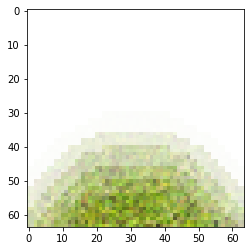

{'TileName': 'I12', 'XCoord': '24', 'YCoord': '12', 'SolidFlags': 'BEU+BER+BED+BSL', 'EdgeUp': 'ECOR_LEFTN', 'EdgeDown': 'ECOR_LEFTN', 'EdgeLeft': 'SBICORNERN', 'EdgeRight': 'EMPTY', 'Fill': '20', 'Comment': 'Oblique Corners', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F1580550>}


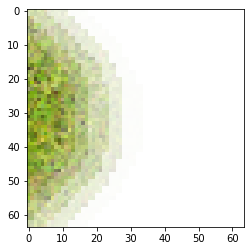

{'TileName': 'I13', 'XCoord': '12', 'YCoord': '16', 'SolidFlags': 'BSU+BER+BED+BEL', 'EdgeUp': 'SBICORNERN', 'EdgeDown': 'EMPTY', 'EdgeLeft': 'ECOR_UPN', 'EdgeRight': 'ECOR_UPN', 'Fill': '20', 'Comment': 'Oblique Corners', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F1562040>}


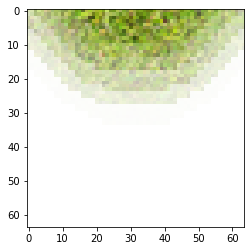

{'TileName': 'I14', 'XCoord': '17', 'YCoord': '12', 'SolidFlags': 'BEU+BSR+BED+BEL', 'EdgeUp': 'ECOR_RIGHTN', 'EdgeDown': 'ECOR_RIGHTN', 'EdgeLeft': 'EMPTY', 'EdgeRight': 'SBICORNERN', 'Fill': '20', 'Comment': 'Oblique Corners', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F1562820>}


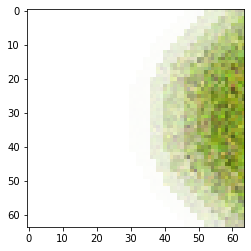

{'TileName': 'I21', 'XCoord': '4', 'YCoord': '9', 'SolidFlags': 'BSU+BSR+BED+BSL', 'EdgeUp': 'SOLID', 'EdgeDown': 'EBICORNERN', 'EdgeLeft': 'SCOR_DOWNN', 'EdgeRight': 'SCOR_DOWNN', 'Fill': '80', 'Comment': 'Oblique Corners', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F1562940>}


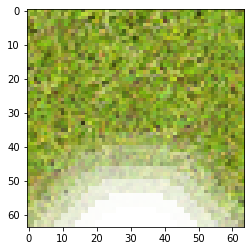

{'TileName': 'I22', 'XCoord': '24', 'YCoord': '4', 'SolidFlags': 'BSU+BSR+BSD+BEL', 'EdgeUp': 'SCOR_LEFTN', 'EdgeDown': 'SCOR_LEFTN', 'EdgeLeft': 'EBICORNERN', 'EdgeRight': 'SOLID', 'Fill': '80', 'Comment': 'Oblique Corners', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F1562B50>}


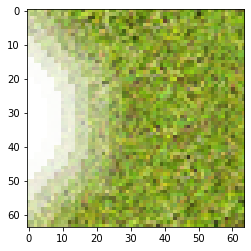

{'TileName': 'I23', 'XCoord': '4', 'YCoord': '16', 'SolidFlags': 'BEU+BSR+BSD+BSL', 'EdgeUp': 'EBICORNERN', 'EdgeDown': 'SOLID', 'EdgeLeft': 'SCOR_UPN', 'EdgeRight': 'SCOR_UPN', 'Fill': '80', 'Comment': 'Oblique Corners', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F1562D30>}


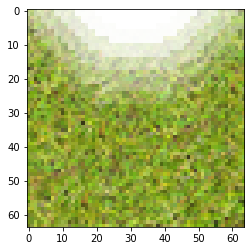

{'TileName': 'I24', 'XCoord': '17', 'YCoord': '4', 'SolidFlags': 'BSU+BER+BSD+BSL', 'EdgeUp': 'ECOR_RIGHTN', 'EdgeDown': 'ECOR_RIGHTN', 'EdgeLeft': 'SOLID', 'EdgeRight': 'EBICORNERN', 'Fill': '80', 'Comment': 'Oblique Corners', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F1562E20>}


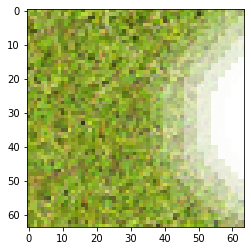

{'TileName': 'J11', 'XCoord': '12', 'YCoord': '10', 'SolidFlags': 'BE', 'EdgeUp': 'SBICORNERT', 'EdgeDown': 'SOLID', 'EdgeLeft': 'SCOR_UPT', 'EdgeRight': 'SCOR_UPT', 'Fill': '90', 'Comment': 'Oblique Corners', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F1562DC0>}


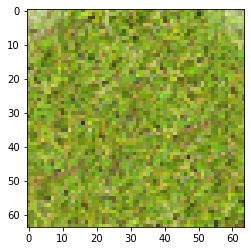

{'TileName': 'J12', 'XCoord': '23', 'YCoord': '12', 'SolidFlags': 'BE', 'EdgeUp': 'SCOR_RIGHTT', 'EdgeDown': 'SCOR_RIGHTT', 'EdgeLeft': 'SOLID', 'EdgeRight': 'SBICORNERT', 'Fill': '90', 'Comment': 'Oblique Corners', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F1562430>}


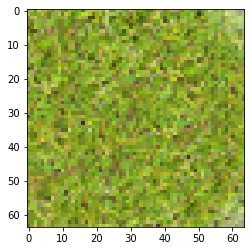

{'TileName': 'J13', 'XCoord': '12', 'YCoord': '15', 'SolidFlags': 'BE', 'EdgeUp': 'SOLID', 'EdgeDown': 'SBICORNERT', 'EdgeLeft': 'SCOR_DOWNT', 'EdgeRight': 'SCOR_DOWNT', 'Fill': '90', 'Comment': 'Oblique Corners', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F1562BB0>}


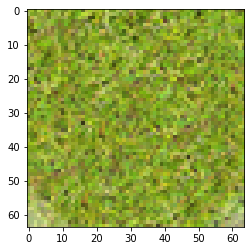

{'TileName': 'J14', 'XCoord': '18', 'YCoord': '12', 'SolidFlags': 'BE', 'EdgeUp': 'SCOR_LEFTT', 'EdgeDown': 'SCOR_LEFTT', 'EdgeLeft': 'SBICORNERT', 'EdgeRight': 'SOLID', 'Fill': '90', 'Comment': 'Oblique Corners', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F1562A00>}


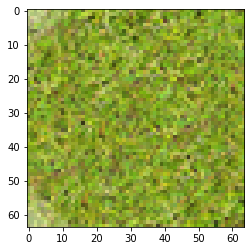

{'TileName': 'J21', 'XCoord': '4', 'YCoord': '10', 'SolidFlags': 'BS', 'EdgeUp': 'EBICORNERT', 'EdgeDown': 'EMPTY', 'EdgeLeft': 'ECOR_UPT', 'EdgeRight': 'ECOR_UPT', 'Fill': '10', 'Comment': 'Oblique Corners', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F1562DF0>}


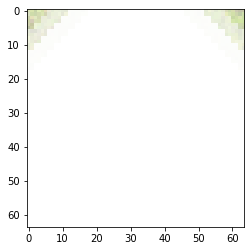

{'TileName': 'J22', 'XCoord': '23', 'YCoord': '4', 'SolidFlags': 'BS', 'EdgeUp': 'ECOR_RIGHTT', 'EdgeDown': 'ECOR_RIGHTT', 'EdgeLeft': 'EMPTY', 'EdgeRight': 'EBICORNERT', 'Fill': '10', 'Comment': 'Oblique Corners', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F15627C0>}


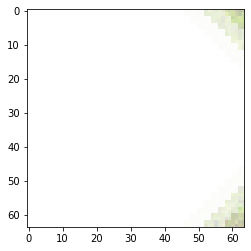

{'TileName': 'J23', 'XCoord': '4', 'YCoord': '15', 'SolidFlags': 'BS', 'EdgeUp': 'EMPTY', 'EdgeDown': 'EBICORNERT', 'EdgeLeft': 'ECOR_DOWNT', 'EdgeRight': 'ECOR_DOWNT', 'Fill': '10', 'Comment': 'Oblique Corners', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F15626A0>}


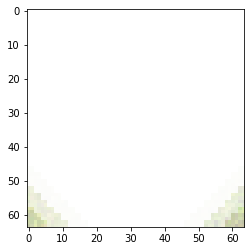

{'TileName': 'J24', 'XCoord': '18', 'YCoord': '4', 'SolidFlags': 'BS', 'EdgeUp': 'ECOR_LEFTT', 'EdgeDown': 'ECOR_LEFTT', 'EdgeLeft': 'EBICORNERT', 'EdgeRight': 'EMPTY', 'Fill': '10', 'Comment': 'Oblique Corners', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F1562310>}


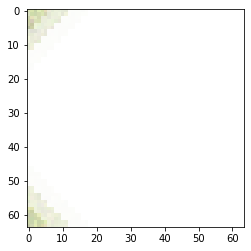

{'TileName': 'K1', 'XCoord': '6', 'YCoord': '18', 'SolidFlags': 'BE', 'EdgeUp': 'EBICORNERT', 'EdgeDown': 'EBICORNERT', 'EdgeLeft': 'EBICORNERT', 'EdgeRight': 'EBICORNERT', 'Fill': '80', 'Comment': 'Singularities', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F1562070>}


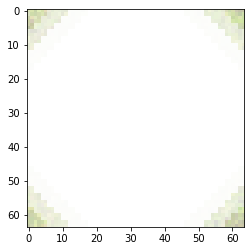

{'TileName': 'K2', 'XCoord': '14', 'YCoord': '18', 'SolidFlags': 'BS', 'EdgeUp': 'SBICORNERT', 'EdgeDown': 'SBICORNERT', 'EdgeLeft': 'SBICORNERT', 'EdgeRight': 'SBICORNERT', 'Fill': '20', 'Comment': 'Singularities', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F1562400>}


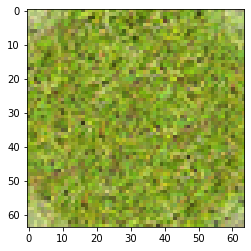

{'TileName': 'L11', 'XCoord': '26', 'YCoord': '2', 'SolidFlags': 'BSD', 'EdgeUp': 'EBICORNERT', 'EdgeDown': 'SOLID', 'EdgeLeft': 'OCOR_UPT', 'EdgeRight': 'OCOR_UPT', 'Fill': '60', 'Comment': 'Singularities', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F15627F0>}


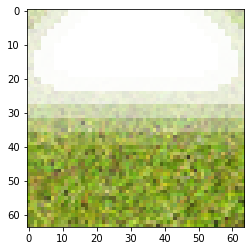

{'TileName': 'L12', 'XCoord': '3', 'YCoord': '18', 'SolidFlags': 'BSL', 'EdgeUp': 'OCOR_RIGHTT', 'EdgeDown': 'OCOR_RIGHTT', 'EdgeLeft': 'SOLID', 'EdgeRight': 'EBICORNERT', 'Fill': '60', 'Comment': 'Singularities', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F1580820>}


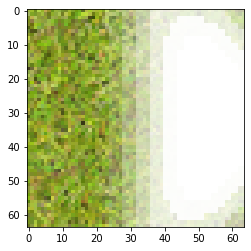

{'TileName': 'L13', 'XCoord': '26', 'YCoord': '3', 'SolidFlags': 'BSU', 'EdgeUp': 'SOLID', 'EdgeDown': 'EBICORNERT', 'EdgeLeft': 'OCOR_DOWNT', 'EdgeRight': 'OCOR_DOWNT', 'Fill': '60', 'Comment': 'Singularities', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F1580070>}


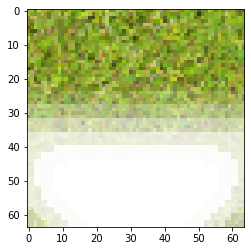

{'TileName': 'L14', 'XCoord': '2', 'YCoord': '18', 'SolidFlags': 'BSR', 'EdgeUp': 'OCOR_LEFTT', 'EdgeDown': 'OCOR_LEFTT', 'EdgeLeft': 'EBICORNERT', 'EdgeRight': 'SOLID', 'Fill': '60', 'Comment': 'Singularities', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F15801C0>}


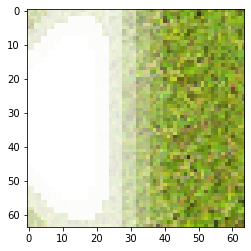

{'TileName': 'L21', 'XCoord': '26', 'YCoord': '10', 'SolidFlags': 'BED', 'EdgeUp': 'SBICORNERT', 'EdgeDown': 'EMPTY', 'EdgeLeft': 'HCOR_UPT', 'EdgeRight': 'HCOR_UPT', 'Fill': '40', 'Comment': 'Singularities', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F1580D60>}


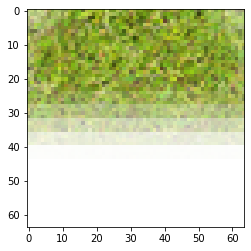

{'TileName': 'L22', 'XCoord': '11', 'YCoord': '18', 'SolidFlags': 'BEL', 'EdgeUp': 'HCOR_RIGHTT', 'EdgeDown': 'HCOR_RIGHTT', 'EdgeLeft': 'EMPTY', 'EdgeRight': 'SBICORNERT', 'Fill': '40', 'Comment': 'Singularities', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F1580E50>}


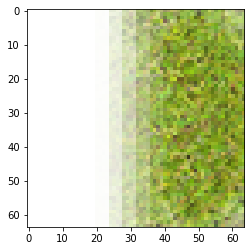

{'TileName': 'L23', 'XCoord': '26', 'YCoord': '11', 'SolidFlags': 'BEU', 'EdgeUp': 'EMPTY', 'EdgeDown': 'SBICORNERT', 'EdgeLeft': 'HCOR_DOWNT', 'EdgeRight': 'HCOR_DOWNT', 'Fill': '40', 'Comment': 'Singularities', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F1580FD0>}


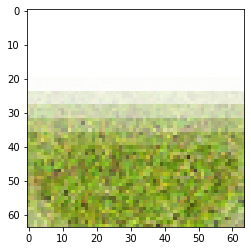

{'TileName': 'L24', 'XCoord': '10', 'YCoord': '18', 'SolidFlags': 'BER', 'EdgeUp': 'HCOR_LEFTT', 'EdgeDown': 'HCOR_LEFTT', 'EdgeLeft': 'SBICORNERT', 'EdgeRight': 'EMPTY', 'Fill': '40', 'Comment': 'Singularities', 'img': <PIL.Image.Image image mode=L size=32x32 at 0x7F07F1580B80>}


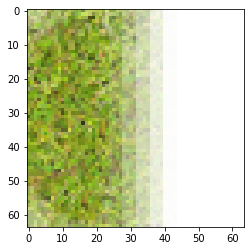

In [9]:
for tile_info in tiles_info:
    print(tile_info)
    hpos, vpos = int(tile_info['XCoord']), int(tile_info['YCoord'])
    tile_img = tile_info['img']

    if tile_info['img'] is None:
        continue
    
    new_tx = texture.copy()
    pixels = new_tx.load()
    
    for tvoff in range(tx_h):
        for thoff in range(tx_w):
            r, g, b, a = new_tx.getpixel((thoff, tvoff))
            hoff = thoff * src_base_w / tx_w
            voff = tvoff * src_base_h / tx_h
            a = tile_img.getpixel((hoff, voff))
            pixels[thoff, tvoff] = (r, g, b, a)
    
    plt.imshow(new_tx)
    plt.show()

del pixels